In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('state_union')

[nltk_data] Downloading package punkt to /Users/ceciliali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


True

In [2]:
# Read the script
script = pd.read_csv('infinityWar.csv')
script.head()

Unnamed: 0     character  \
0       12998  ASGARDIAN PA   
1       12999     EBONY MAW   
2       13000        THANOS   
3       13001          THOR   
4       13002        THANOS   

                                                line                   movie  
0  This is the Asgardian refugee vessel Statesman...  Avengers: Infinity War  
1  Hear me, and rejoice. You have had the privile...  Avengers: Infinity War  
2  I know what it's like to lose. To feel so desp...  Avengers: Infinity War  
3                                 You talk too much.  Avengers: Infinity War  
4  The Tesseract, or your brother's head. I assum...  Avengers: Infinity War

In [3]:
script = script.drop(['movie'], axis=1)
script.head()

Unnamed: 0     character                                               line
0       12998  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...
1       12999     EBONY MAW  Hear me, and rejoice. You have had the privile...
2       13000        THANOS  I know what it's like to lose. To feel so desp...
3       13001          THOR                                 You talk too much.
4       13002        THANOS  The Tesseract, or your brother's head. I assum...

In [4]:
script = script.rename(columns={'Unnamed: 0': 'lineNum'})
# Reset lineNum
script['lineNum'] = np.arange(1, len(script)+1)
script.head()

lineNum     character                                               line
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...
2        3        THANOS  I know what it's like to lose. To feel so desp...
3        4          THOR                                 You talk too much.
4        5        THANOS  The Tesseract, or your brother's head. I assum...

In [5]:
# Cleaning the text
# Define a function to clean the text
# def clean(text):
# # Removes all special characters and numericals leaving the alphabets
#     text = re.sub('[^A-Za-z]+', ' ', text)
#     return text

# # Cleaning the text in the review column
# script['clean_line'] = script['line'].apply(clean)

# Remove punctuation 
script['clean_line'] = script['line'].str.replace('[^\w\s]','')
script.head()

/var/folders/mk/x97yxl6121bfr4x7_4d7xfyc0000gn/T/ipykernel_38897/3066775154.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  script['clean_line'] = script['line'].str.replace('[^\w\s]','')


lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  
0  This is the Asgardian refugee vessel Statesman...  
1  Hear me and rejoice You have had the privilege...  
2  I know what its like to lose To feel so desper...  
3                                  You talk too much  
4  The Tesseract or your brothers head I assume y...

In [6]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

# Tokenization and POS tagging
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

script['POS tagged'] = script['clean_line'].apply(token_stop_pos)
script.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...  
1  [(Hear, None), (rejoice, v), (privilege, n), (...  
2  [(know, v), (like, n), (lose, v), (feel, v), (...  
3                             [(talk, v), (much, a)]  
4  [(Tesseract, n), (brothers, n), (head, v), (as...

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

script['Lemma'] = script['POS tagged'].apply(lemmatize)
script.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  
0    Asgardian refugee vessel Statesman assault r...  
1    Hear rejoice privilege save Great Titan may ...  
2    know like lose feel desperately youre right ...  
3                                          talk much  
4           Tesseract brother head assume preference

# Part 1: Text analysis

## Wordcloud

In [8]:
cloud = pd.DataFrame(script[['lineNum', 'line', 'Lemma']])
cloud

lineNum                                               line  \
0          1  This is the Asgardian refugee vessel Statesman...   
1          2  Hear me, and rejoice. You have had the privile...   
2          3  I know what it's like to lose. To feel so desp...   
3          4                                 You talk too much.   
4          5  The Tesseract, or your brother's head. I assum...   
..       ...                                                ...   
934      935                                         They okay?   
935      936                               There's no one here.   
936      937                            Call Control. Code Red.   
937      938                                              Nick?   
938      939                            Hill? Oh, no. Motherf--   

                                                 Lemma  
0      Asgardian refugee vessel Statesman assault r...  
1      Hear rejoice privilege save Great Titan may ...  
2      know like lose feel desperately youre right ...  
3                                            talk much  
4             Tesseract brother head assume preference  
..                                                 ...  
934                                               okay  
935                                         Theres one  
936                              Call Control Code Red  
937                                               Nick  
938                                    Hill Oh Motherf  

[939 rows x 3 columns]

In [9]:
# Concatenate all lines
lines = " ".join(clean_line for clean_line in cloud['Lemma'])

In [10]:
len(lines)

28646

In [11]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
len(STOPWORDS)

lines = remove_stopwords(lines)
len(lines)

23290

In [12]:
# Tokenize the words
from nltk.tokenize import word_tokenize
tokens  = word_tokenize(lines)
len(tokens)

3895

In [13]:
# Make all words small letters
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

In [14]:
from nltk.corpus import stopwords
stop_words   = (stopwords.words('english'))
len(stop_words)

filtered_words = [w for w in tokens if not w in stop_words]
len(filtered_words)

3895

In [15]:
import spacy
en = spacy.load('en_core_web_sm')
spacy_stop_words = en.Defaults.stop_words
len(spacy_stop_words)

filtered_words2 = [w for w in filtered_words if not w in spacy_stop_words]
len(filtered_words2)

3802

In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
len(ENGLISH_STOP_WORDS)

filtered_words3 = [w for w in filtered_words2 if not w in ENGLISH_STOP_WORDS]
len(filtered_words3)

3800

In [108]:
# Manually input extra words
extra_words=['im', 'get', 'go', 'know', 'dont', 'youre', 'na', 'think', 'right', 'yeah', 'thats', 'tell', 'gon',
            'okay', 'hey', 'whats', 'youll', 'ill', 'didnt', 'hes', 'wan', 'ive', 'theres', 'id', 'uh', 'oh', 'look',
            'want', 'need', 'let', 'ta']

filtered_words4 = [w for w in filtered_words3 if not w in extra_words]
filtered_words4[1:10]

['refugee',
 'vessel',
 'statesman',
 'assault',
 'repeat',
 'assault',
 'engine',
 'dead',
 'life']

In [109]:
len(filtered_words4)

3018

In [110]:
string_text = ' '.join(filtered_words4)   

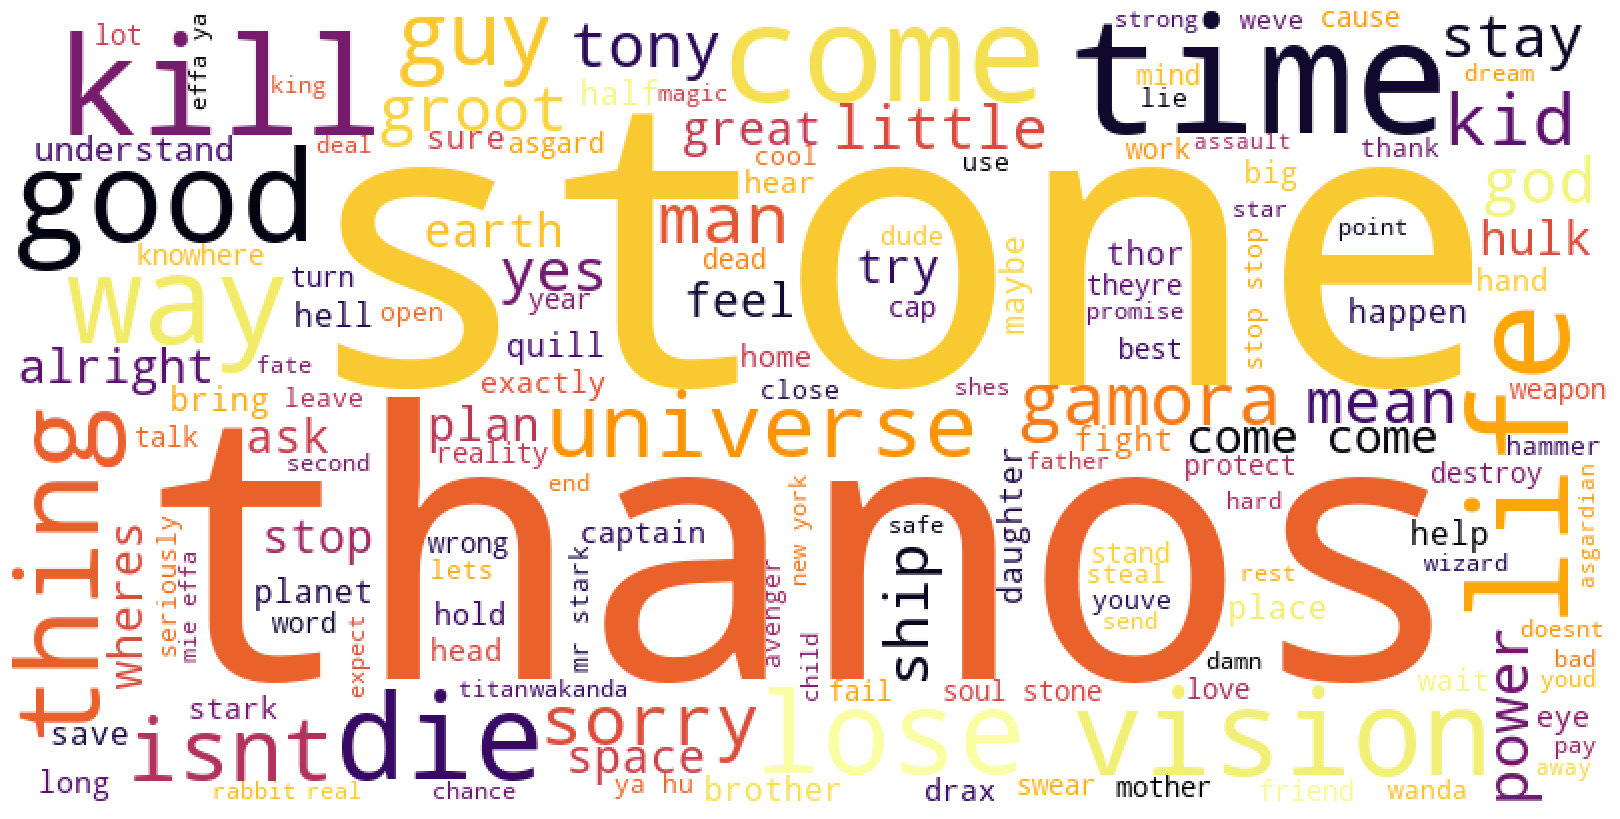

In [117]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=200, min_font_size=10, max_words=150, background_color="white",
                      colormap='inferno',
                     width=800, height=400, prefer_horizontal=0.99).generate(string_text)
                                                                            
# Display the generated image:
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [21]:
freq = nltk.FreqDist(filtered_words4)

freq.most_common(20)

[('stone', 53),
 ('thanos', 44),
 ('come', 44),
 ('like', 35),
 ('time', 32),
 ('need', 24),
 ('kill', 23),
 ('life', 22),
 ('stop', 22),
 ('want', 21),
 ('good', 19),
 ('way', 18),
 ('die', 17),
 ('lose', 16),
 ('let', 16),
 ('universe', 16),
 ('vision', 16),
 ('thing', 15),
 ('isnt', 15),
 ('stark', 14)]

## Network to analysis characters' relationship


In [22]:
network = script.copy()
network

lineNum     character                                               line  \
0          1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1          2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2          3        THANOS  I know what it's like to lose. To feel so desp...   
3          4          THOR                                 You talk too much.   
4          5        THANOS  The Tesseract, or your brother's head. I assum...   
..       ...           ...                                                ...   
934      935     NICK FURY                                         They okay?   
935      936    MARIA HILL                               There's no one here.   
936      937     NICK FURY                            Call Control. Code Red.   
937      938    MARIA HILL                                              Nick?   
938      939     NICK FURY                            Hill? Oh, no. Motherf--   

                                            clean_line  \
0    This is the Asgardian refugee vessel Statesman...   
1    Hear me and rejoice You have had the privilege...   
2    I know what its like to lose To feel so desper...   
3                                    You talk too much   
4    The Tesseract or your brothers head I assume y...   
..                                                 ...   
934                                          They okay   
935                                 Theres no one here   
936                              Call Control Code Red   
937                                               Nick   
938                                 Hill Oh no Motherf   

                                            POS tagged  \
0    [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1    [(Hear, None), (rejoice, v), (privilege, n), (...   
2    [(know, v), (like, n), (lose, v), (feel, v), (...   
3                               [(talk, v), (much, a)]   
4    [(Tesseract, n), (brothers, n), (head, v), (as...   
..                                                 ...   
934                                        [(okay, v)]   
935                            [(Theres, v), (one, n)]   
936     [(Call, v), (Control, n), (Code, n), (Red, n)]   
937                                        [(Nick, n)]   
938                 [(Hill, n), (Oh, n), (Motherf, n)]   

                                                 Lemma  
0      Asgardian refugee vessel Statesman assault r...  
1      Hear rejoice privilege save Great Titan may ...  
2      know like lose feel desperately youre right ...  
3                                            talk much  
4             Tesseract brother head assume preference  
..                                                 ...  
934                                               okay  
935                                         Theres one  
936                              Call Control Code Red  
937                                               Nick  
938                                    Hill Oh Motherf  

[939 rows x 6 columns]

In [23]:
# Combine character and line 
network['char_line'] = network['character'] + network['Lemma']
network

lineNum     character                                               line  \
0          1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1          2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2          3        THANOS  I know what it's like to lose. To feel so desp...   
3          4          THOR                                 You talk too much.   
4          5        THANOS  The Tesseract, or your brother's head. I assum...   
..       ...           ...                                                ...   
934      935     NICK FURY                                         They okay?   
935      936    MARIA HILL                               There's no one here.   
936      937     NICK FURY                            Call Control. Code Red.   
937      938    MARIA HILL                                              Nick?   
938      939     NICK FURY                            Hill? Oh, no. Motherf--   

                                            clean_line  \
0    This is the Asgardian refugee vessel Statesman...   
1    Hear me and rejoice You have had the privilege...   
2    I know what its like to lose To feel so desper...   
3                                    You talk too much   
4    The Tesseract or your brothers head I assume y...   
..                                                 ...   
934                                          They okay   
935                                 Theres no one here   
936                              Call Control Code Red   
937                                               Nick   
938                                 Hill Oh no Motherf   

                                            POS tagged  \
0    [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1    [(Hear, None), (rejoice, v), (privilege, n), (...   
2    [(know, v), (like, n), (lose, v), (feel, v), (...   
3                               [(talk, v), (much, a)]   
4    [(Tesseract, n), (brothers, n), (head, v), (as...   
..                                                 ...   
934                                        [(okay, v)]   
935                            [(Theres, v), (one, n)]   
936     [(Call, v), (Control, n), (Code, n), (Red, n)]   
937                                        [(Nick, n)]   
938                 [(Hill, n), (Oh, n), (Motherf, n)]   

                                                 Lemma  \
0      Asgardian refugee vessel Statesman assault r...   
1      Hear rejoice privilege save Great Titan may ...   
2      know like lose feel desperately youre right ...   
3                                            talk much   
4             Tesseract brother head assume preference   
..                                                 ...   
934                                               okay   
935                                         Theres one   
936                              Call Control Code Red   
937                                               Nick   
938                                    Hill Oh Motherf   

                                             char_line  
0    ASGARDIAN PA  Asgardian refugee vessel Statesm...  
1    EBONY MAW  Hear rejoice privilege save Great T...  
2    THANOS  know like lose feel desperately youre ...  
3                                      THOR  talk much  
4     THANOS  Tesseract brother head assume preference  
..                                                 ...  
934                                    NICK FURY  okay  
935                             MARIA HILL  Theres one  
936                   NICK FURY  Call Control Code Red  
937                                   MARIA HILL  Nick  
938                         NICK FURY  Hill Oh Motherf  

[939 rows x 7 columns]

In [24]:
# List of characters
network['character_word_by_word'] = network['character'].str.split(' ')
network['character_word_by_word'] = tuple(list(network['character_word_by_word']))
network

lineNum     character                                               line  \
0          1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1          2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2          3        THANOS  I know what it's like to lose. To feel so desp...   
3          4          THOR                                 You talk too much.   
4          5        THANOS  The Tesseract, or your brother's head. I assum...   
..       ...           ...                                                ...   
934      935     NICK FURY                                         They okay?   
935      936    MARIA HILL                               There's no one here.   
936      937     NICK FURY                            Call Control. Code Red.   
937      938    MARIA HILL                                              Nick?   
938      939     NICK FURY                            Hill? Oh, no. Motherf--   

                                            clean_line  \
0    This is the Asgardian refugee vessel Statesman...   
1    Hear me and rejoice You have had the privilege...   
2    I know what its like to lose To feel so desper...   
3                                    You talk too much   
4    The Tesseract or your brothers head I assume y...   
..                                                 ...   
934                                          They okay   
935                                 Theres no one here   
936                              Call Control Code Red   
937                                               Nick   
938                                 Hill Oh no Motherf   

                                            POS tagged  \
0    [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1    [(Hear, None), (rejoice, v), (privilege, n), (...   
2    [(know, v), (like, n), (lose, v), (feel, v), (...   
3                               [(talk, v), (much, a)]   
4    [(Tesseract, n), (brothers, n), (head, v), (as...   
..                                                 ...   
934                                        [(okay, v)]   
935                            [(Theres, v), (one, n)]   
936     [(Call, v), (Control, n), (Code, n), (Red, n)]   
937                                        [(Nick, n)]   
938                 [(Hill, n), (Oh, n), (Motherf, n)]   

                                                 Lemma  \
0      Asgardian refugee vessel Statesman assault r...   
1      Hear rejoice privilege save Great Titan may ...   
2      know like lose feel desperately youre right ...   
3                                            talk much   
4             Tesseract brother head assume preference   
..                                                 ...   
934                                               okay   
935                                         Theres one   
936                              Call Control Code Red   
937                                               Nick   
938                                    Hill Oh Motherf   

                                             char_line character_word_by_word  
0    ASGARDIAN PA  Asgardian refugee vessel Statesm...        [ASGARDIAN, PA]  
1    EBONY MAW  Hear rejoice privilege save Great T...           [EBONY, MAW]  
2    THANOS  know like lose feel desperately youre ...               [THANOS]  
3                                      THOR  talk much                 [THOR]  
4     THANOS  Tesseract brother head assume preference               [THANOS]  
..                                                 ...                    ...  
934                                    NICK FURY  okay           [NICK, FURY]  
935                             MARIA HILL  Theres one          [MARIA, HILL]  
936                   NICK FURY  Call Control Code Red           [NICK, FURY]  
937                                   MARIA HILL  Nick          [MARIA, HILL]  
938                         NICK FURY  Hill Oh Motherf       

In [25]:
# Replace space with underscore for characters
network['character'] = network['character'].str.replace(" ", "_")
network

lineNum     character                                               line  \
0          1  ASGARDIAN_PA  This is the Asgardian refugee vessel Statesman...   
1          2     EBONY_MAW  Hear me, and rejoice. You have had the privile...   
2          3        THANOS  I know what it's like to lose. To feel so desp...   
3          4          THOR                                 You talk too much.   
4          5        THANOS  The Tesseract, or your brother's head. I assum...   
..       ...           ...                                                ...   
934      935     NICK_FURY                                         They okay?   
935      936    MARIA_HILL                               There's no one here.   
936      937     NICK_FURY                            Call Control. Code Red.   
937      938    MARIA_HILL                                              Nick?   
938      939     NICK_FURY                            Hill? Oh, no. Motherf--   

                                            clean_line  \
0    This is the Asgardian refugee vessel Statesman...   
1    Hear me and rejoice You have had the privilege...   
2    I know what its like to lose To feel so desper...   
3                                    You talk too much   
4    The Tesseract or your brothers head I assume y...   
..                                                 ...   
934                                          They okay   
935                                 Theres no one here   
936                              Call Control Code Red   
937                                               Nick   
938                                 Hill Oh no Motherf   

                                            POS tagged  \
0    [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1    [(Hear, None), (rejoice, v), (privilege, n), (...   
2    [(know, v), (like, n), (lose, v), (feel, v), (...   
3                               [(talk, v), (much, a)]   
4    [(Tesseract, n), (brothers, n), (head, v), (as...   
..                                                 ...   
934                                        [(okay, v)]   
935                            [(Theres, v), (one, n)]   
936     [(Call, v), (Control, n), (Code, n), (Red, n)]   
937                                        [(Nick, n)]   
938                 [(Hill, n), (Oh, n), (Motherf, n)]   

                                                 Lemma  \
0      Asgardian refugee vessel Statesman assault r...   
1      Hear rejoice privilege save Great Titan may ...   
2      know like lose feel desperately youre right ...   
3                                            talk much   
4             Tesseract brother head assume preference   
..                                                 ...   
934                                               okay   
935                                         Theres one   
936                              Call Control Code Red   
937                                               Nick   
938                                    Hill Oh Motherf   

                                             char_line character_word_by_word  
0    ASGARDIAN PA  Asgardian refugee vessel Statesm...        [ASGARDIAN, PA]  
1    EBONY MAW  Hear rejoice privilege save Great T...           [EBONY, MAW]  
2    THANOS  know like lose feel desperately youre ...               [THANOS]  
3                                      THOR  talk much                 [THOR]  
4     THANOS  Tesseract brother head assume preference               [THANOS]  
..                                                 ...                    ...  
934                                    NICK FURY  okay           [NICK, FURY]  
935                             MARIA HILL  Theres one          [MARIA, HILL]  
936                   NICK FURY  Call Control Code Red           [NICK, FURY]  
937                                   MARIA HILL  Nick          [MARIA, HILL]  
938                         NICK FURY  Hill Oh Motherf       

In [26]:
# Distinct characters
character_list = network['character'].unique()
char = character_list.tolist()
type(char)

list

In [27]:
numCharacters = len(char)
numCharacters

47

In [28]:
# Dictionary for characters
character_map = {}
for i in range(numCharacters):
    character_map[i] = char[i]

character_map

{0: 'ASGARDIAN_PA',
 1: 'EBONY_MAW',
 2: 'THANOS',
 3: 'THOR',
 4: 'LOKI',
 5: 'HEIMDALL',
 6: 'PROXIMA_MIDNIGHT',
 7: 'CULL_OBSIDIAN',
 8: 'STEPHEN_STRANGE',
 9: 'WONG',
 10: 'BRUCE_BANNER',
 11: 'TONY_STARK',
 12: 'PEPPER_POTTS',
 13: 'FRIDAY',
 14: 'PETER_PARKER',
 15: 'NED_LEEDS',
 16: 'STAN_LEE',
 17: 'HULK',
 18: 'PETER_QUILL',
 19: 'ROCKET',
 20: 'GAMORA',
 21: 'DRAX',
 22: 'MANTIS',
 23: 'GROOT',
 24: 'WANDA_MAXIMOFF',
 25: 'VISION',
 26: 'CORVUS_GLAIVE',
 27: 'NATASHA_ROMANOFF',
 28: 'SAM_WILSON',
 29: 'STEVE_ROGERS',
 30: "GAMORA'S_MOTHER",
 31: 'YOUNG_GAMORA',
 32: 'COLLECTOR',
 33: 'SECRETARY_ROSS',
 34: 'JAMES_RHODES',
 35: 'OKOYE',
 36: "T'CHALLA",
 37: 'BUCKY_BARNES',
 38: 'NEBULA',
 39: 'EITRI',
 40: 'RED_SKULL',
 41: 'SHURI',
 42: 'JABARI_WARRIORS',
 43: "M'BAKU",
 44: 'DOME_CONTROL',
 45: 'NICK_FURY',
 46: 'MARIA_HILL'}

In [29]:
# Combine char_line columns into a string
all_char_line = " ".join(char_line for char_line in network['char_line'])
# all_char_line

# # Tokenize all_char_line
# char_line_token  = word_tokenize(all_char_line)

In [30]:
token_exception = []
for i in range(len(network)):
    token_exception.append(tuple(network.loc[i, 'character_word_by_word']))

In [31]:
# Tokenize all_char_line except for characters
from nltk.tokenize import MWETokenizer
tokenizer=MWETokenizer(token_exception)

char_line_token = tokenizer.tokenize(all_char_line.split())

In [32]:
# Find occurence of each character 
k=0;
numOccurrences=pd.Series(range(numCharacters))
for character in character_list:
    numOccurrences[k] =char_line_token.count(character)
    k=k+1

In [33]:
numOccurrences

0       1
1      16
2      72
3      75
4       6
5       1
6       8
7       1
8      57
9      10
10     45
11    119
12     22
13      9
14     39
15      1
16      1
17      3
18     81
19     46
20     45
21     28
22     17
23      8
24     30
25     26
26      3
27     15
28      9
29     25
30      1
31      4
32      5
33      8
34     17
35     11
36     17
37      8
38      8
39     15
40      9
41      6
42      2
43      3
44      1
45      7
46      6
dtype: int64

Text(0, 0.5, 'Number of occurence')

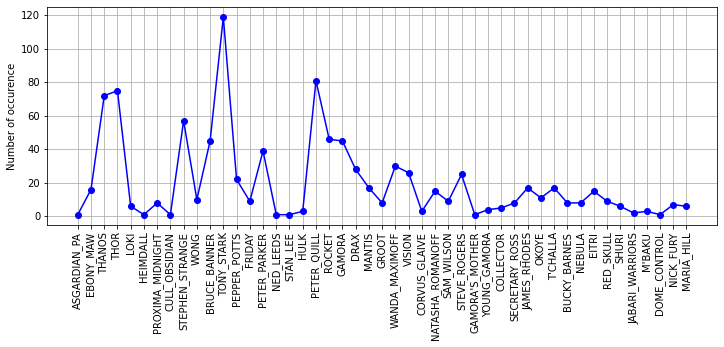

In [34]:
fig   = plt.figure(figsize = (12, 4))
plt.style.use('default')
ax    = fig.add_subplot(111)
plt.plot(numOccurrences,'b-o')
plt.xticks(np.arange(0,numCharacters),character_list)
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=10)
plt.ylabel('Number of occurence')

In [35]:
# Create ndarray with zeros for position of each character
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a)     

In [36]:
numCharacters

47

In [37]:
# Iterate over every character and find the position 
for j in range(numCharacters):
    positions_current=[]
    for i in range(len(char_line_token)):
        if char_line_token[i]==character_list[j]:
#             print(i)
            positions_current.append(i)
#     print(positions_current)
    positions_characters[j][:]=positions_current   

In [38]:
#positions_characters[1]

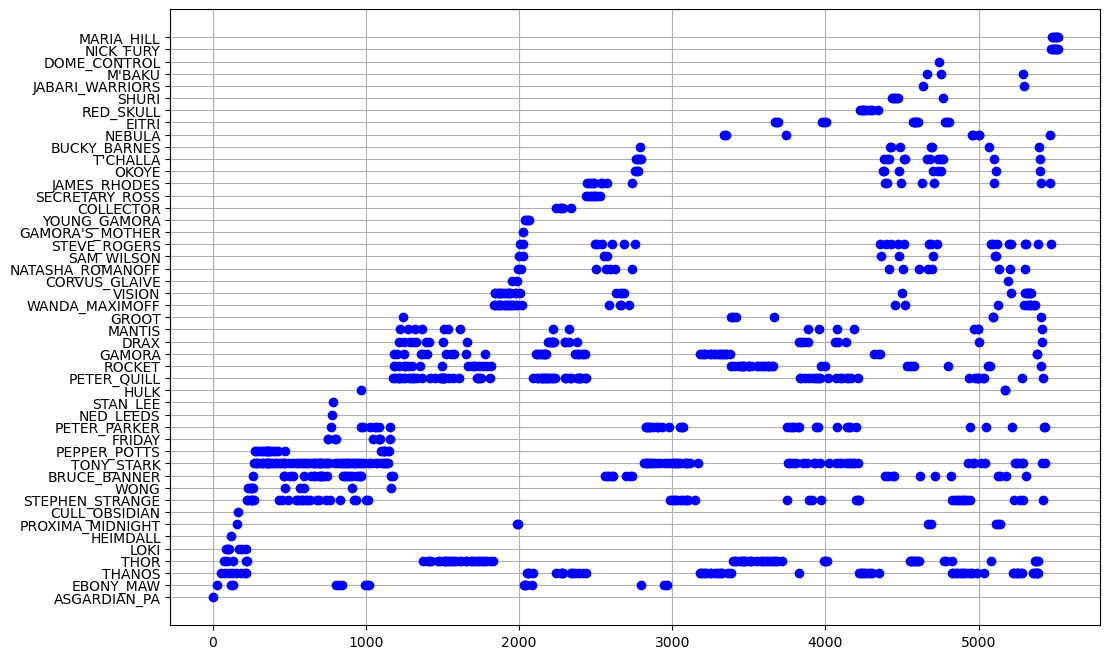

In [39]:
fig   = plt.figure(figsize = (12, 8))
ax    = fig.add_subplot(111)
for j in range(0,numCharacters):
    plt.plot( positions_characters[j],j*np.ones(numOccurrences[j]),'bo')
    
plt.yticks(np.arange(0,numCharacters),character_list)
plt.grid()

In [40]:
# Find the distance between characters
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters-1):
    for j in range(i+1,numCharacters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                # find distance
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                #if distance is small, then record interaction
                if (dist<200):
                    interactions_characters[i,j]=interactions_characters[i,j]+1
                    interactions_characters[j,i]=interactions_characters[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)
        
#positions_characters
#interactions_characters

In [41]:
interactions_characters.shape

(47, 47)

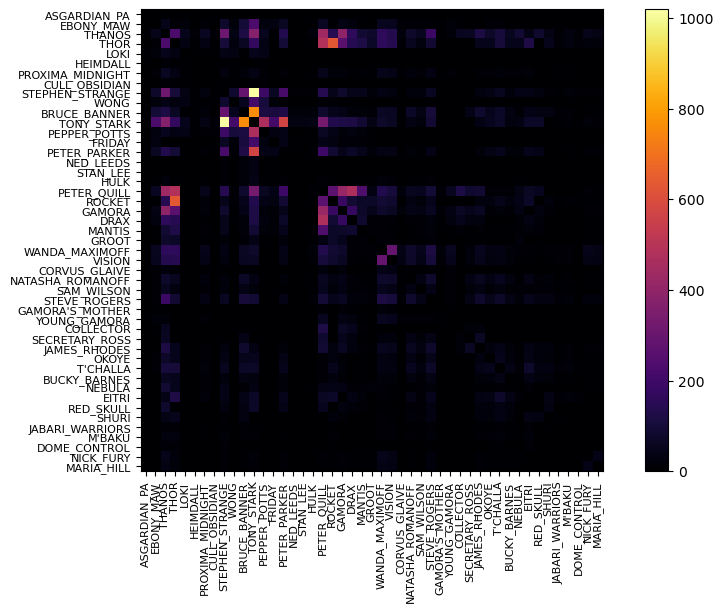

In [42]:
import matplotlib
fig2 = plt.figure(figsize = (11, 6)) 
ax2    = fig2.add_subplot(111)
plt.imshow(interactions_characters,cmap=matplotlib.cm.inferno) 
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax2.tick_params(axis='x', rotation=90, labelsize=8)
ax2.tick_params(axis='y', labelsize=8)

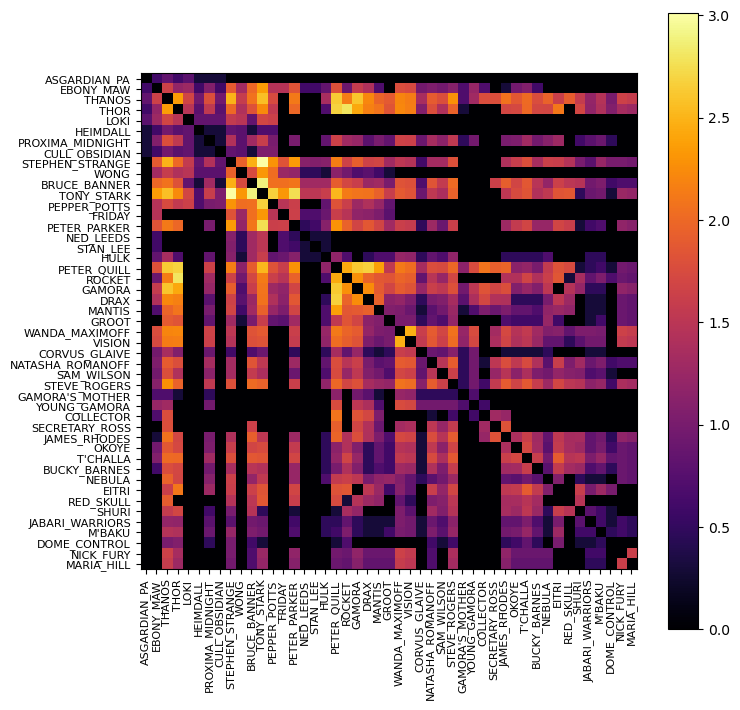

In [43]:
#Take log of the graph
fig3 = plt.figure(figsize = (8, 8)) 
ax3    = fig3.add_subplot(111)
plt.imshow(np.log10(1+interactions_characters),cmap=matplotlib.cm.inferno)
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax3.tick_params(axis='x', rotation=90, labelsize=8)
ax3.tick_params(axis='y', labelsize=8)

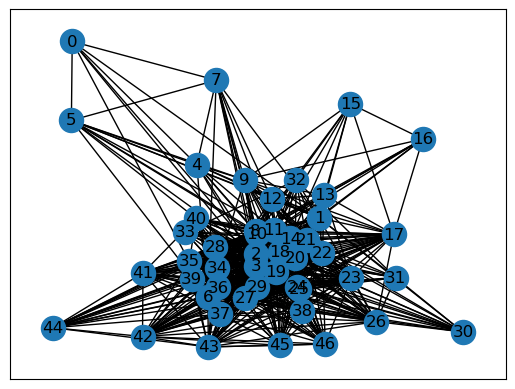

In [44]:
import networkx as nx
G1=nx.from_numpy_matrix(interactions_characters)
nx.draw_networkx(G1)

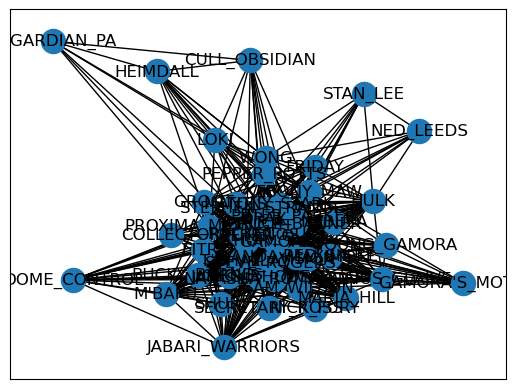

In [45]:
H1 = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1)

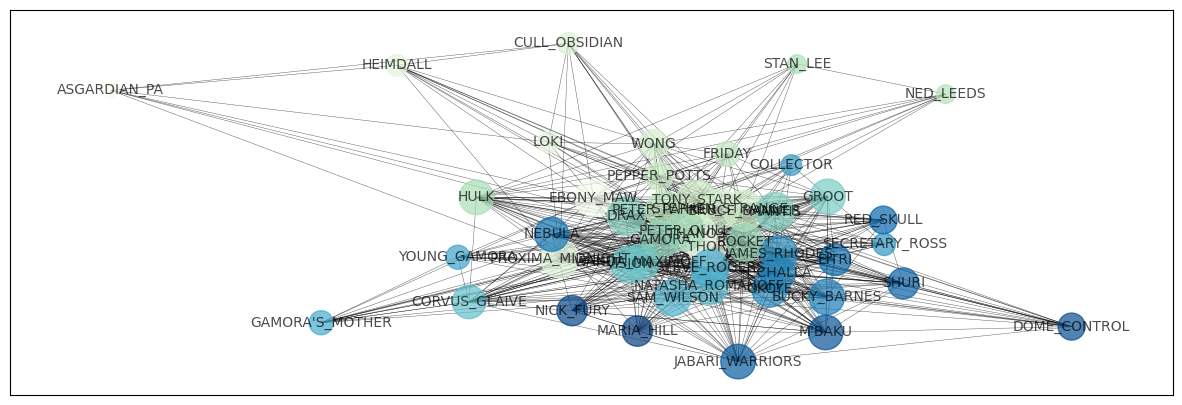

In [46]:
# Change size of node according to degree (number of neighbours)
kdeg  = G1.degree()
fig   = plt.figure(figsize = (15, 5))
ax1   = plt.subplot(111)
H1    = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=10, cmap=matplotlib.cm.GnBu
                 ,node_size =[20*val for (node,val) in kdeg])

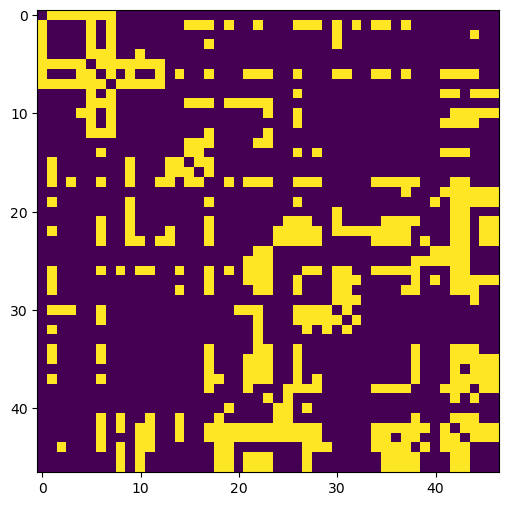

In [47]:
# Adjacency matrix withfcases less than a certain number of occurences
plt.figure(figsize = (11, 6)) 
plt.imshow((interactions_characters<=10)&(interactions_characters>0)) 

In [48]:
# Delete interactions with less than 30 occurences
interactions_characters[interactions_characters<=30]=0
G2=nx.from_numpy_matrix(interactions_characters)

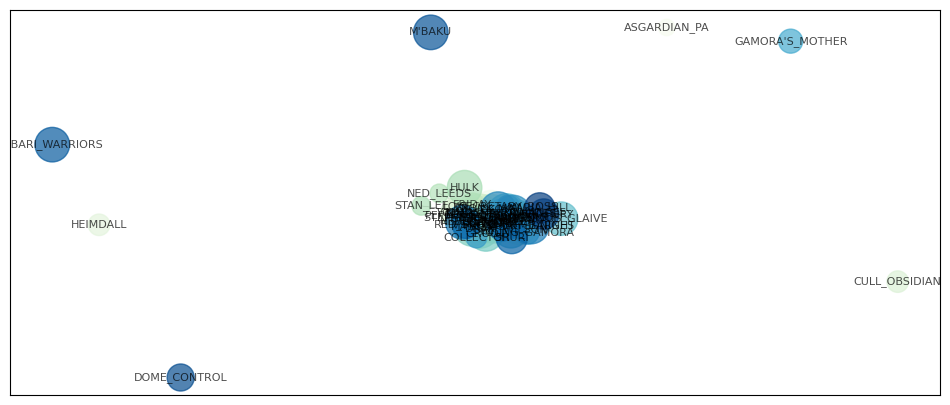

In [49]:
fig   = plt.figure(figsize = (12, 5))
ax1   = plt.subplot(111)
H2    = nx.relabel_nodes(nx.from_numpy_matrix(np.log10(1+interactions_characters)), character_map)
nx.draw_networkx(H2, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, font_size=8, cmap=matplotlib.cm.GnBu,node_size =[20*val for (node,val) in kdeg])


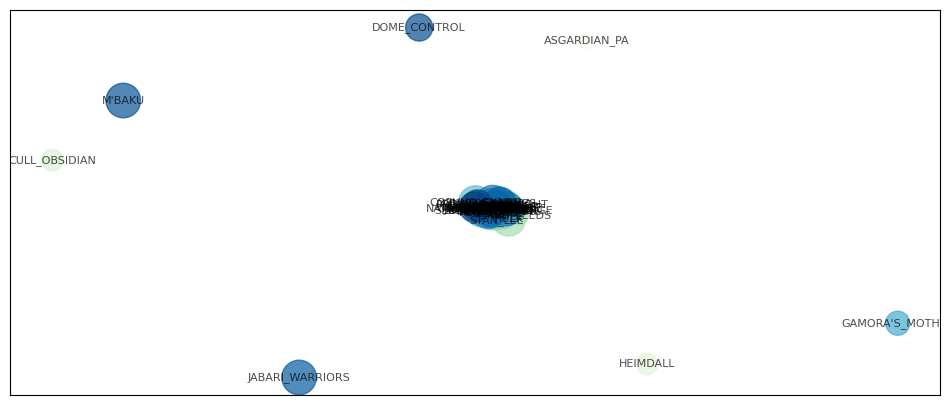

In [50]:
fig   = plt.figure(figsize = (12, 5))
ax1   = plt.subplot(111)
H2    = nx.relabel_nodes(nx.from_numpy_matrix(interactions_characters), character_map)
nx.draw_networkx(H2, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=8, cmap=matplotlib.cm.GnBu,node_size =[20*val for (node,val) in kdeg])

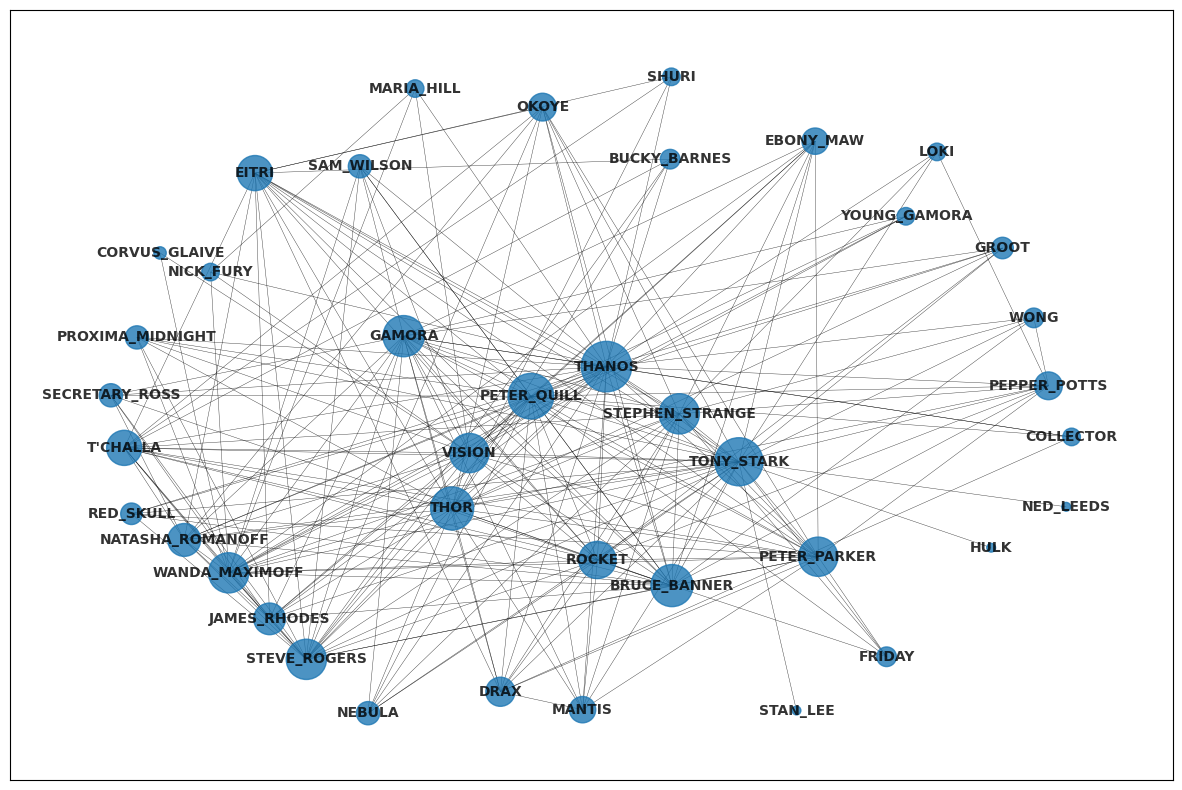

In [51]:
# Only show the largest subset
largestSubgraph = max(nx.connected_components(G2), key = len)
largest_component = G2.subgraph(largestSubgraph)
H3 = nx.relabel_nodes(largest_component, character_map)

pos = nx.spring_layout(H3, k=10)

fig = plt.figure(figsize=(15, 10))
largest_kdeg  = H3.degree()
d = dict(largest_kdeg)

nx.draw_networkx(H3, pos=pos, font_color='black',width=0.3,alpha=0.8, font_weight='bold',
                 font_size=10, cmap=matplotlib.cm.GnBu, node_size =[40*val for (node,val) in largest_kdeg])

In [52]:
type(largest_component)

networkx.classes.graph.Graph

In [53]:
degree_centrality = nx.degree_centrality(H1)
nx.set_node_attributes(H1,degree_centrality,'dc')
centralityValues=[v for v in degree_centrality.values()]

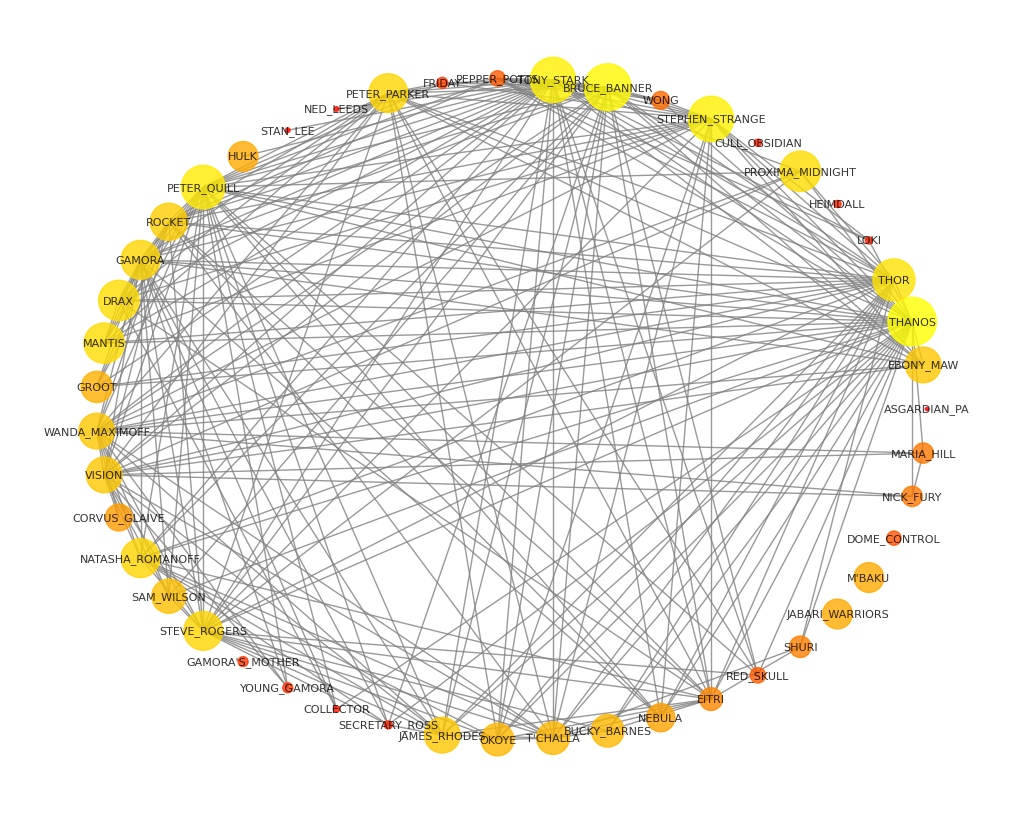

In [54]:
fig   = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color=centralityValues,font_color='black',alpha=0.8,edge_color='gray',
#                  edge_weight=5,
                 font_size=8,with_labels=True, cmap=matplotlib.cm.autumn,
                 node_size=[1500*(v**3) for v in degree_centrality.values()])

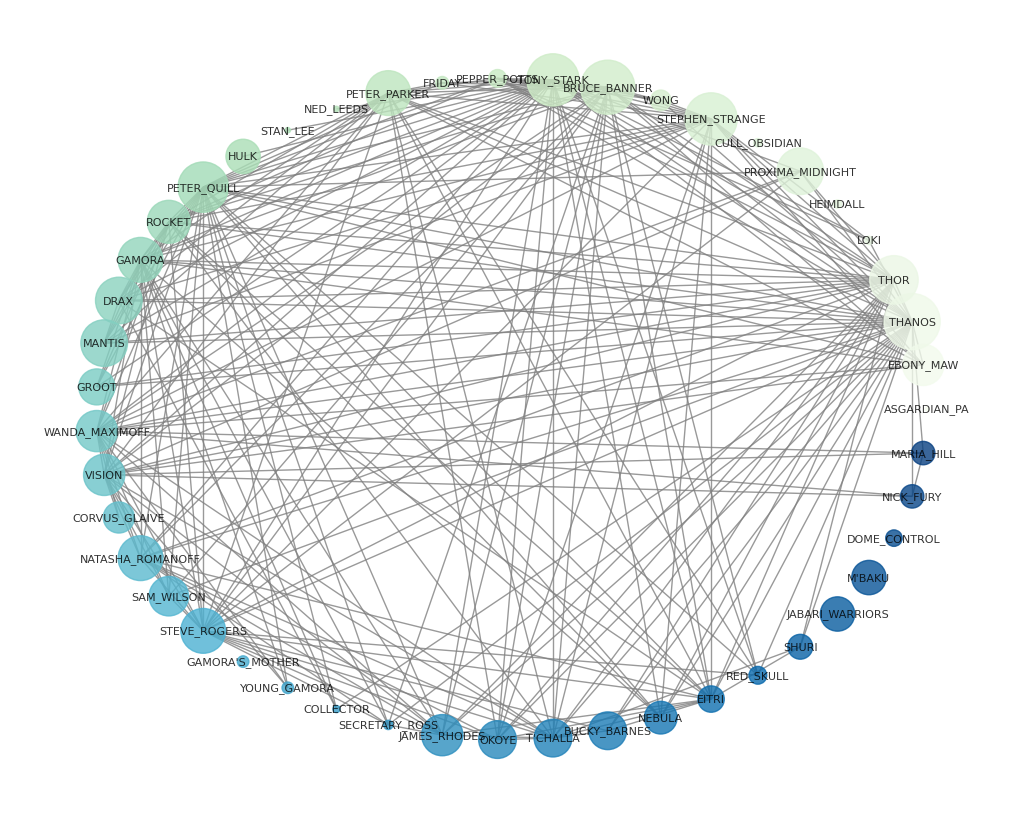

In [55]:
fig   = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
#                  edge_weight=5,
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[2000*(v**3) for v in degree_centrality.values()])


In [56]:
cliques = list(nx.find_cliques(H3))
cl2 = list(cliques)
len(cl2)

35

(-1.2026740091014458,
 1.1329026672104536,
 -1.0164740937024168,
 1.002619824343891)

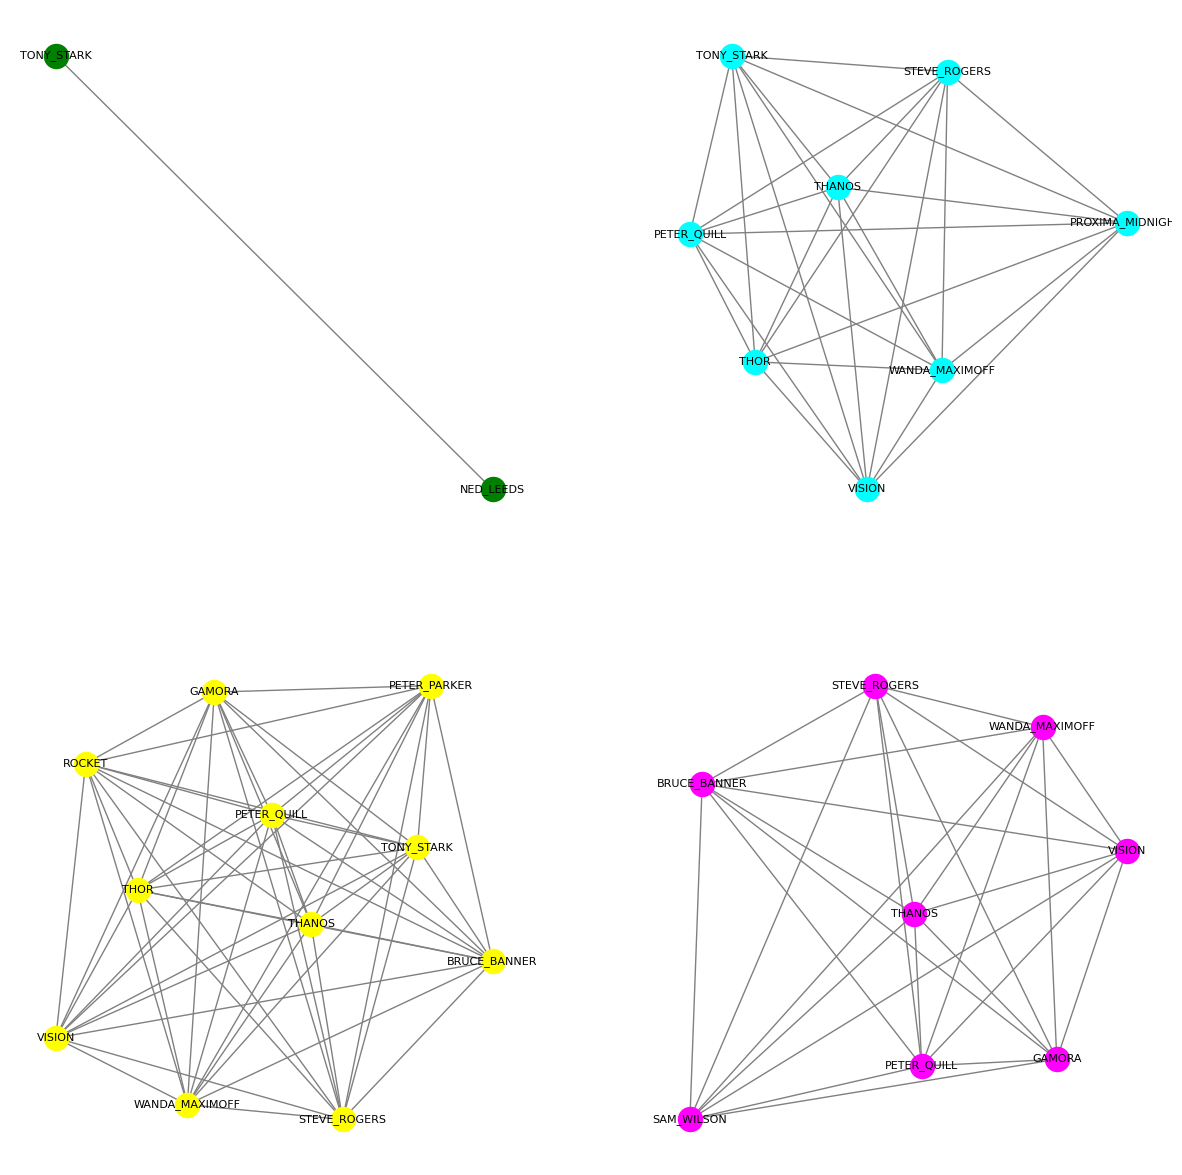

In [57]:
fig   = plt.figure(figsize = (15, 15))
ax1  = fig.add_subplot(221)
nx.draw_networkx(H2.subgraph(cl2[0]),font_size=8,font_color='black',node_color='green',edge_color='gray')
plt.axis('off')
ax2  = fig.add_subplot(222)
nx.draw_networkx(H2.subgraph(cl2[10]),font_size=8,font_color='black',node_color='cyan',edge_color='gray')
plt.axis('off')
ax3  = fig.add_subplot(223)
nx.draw_networkx(H2.subgraph(cl2[15]),font_size=8,font_color='black',node_color='yellow',edge_color='gray')
plt.axis('off')
ax4  = fig.add_subplot(224)
nx.draw_networkx(H2.subgraph(cl2[28]),font_size=8,font_color='black',node_color='#ff00ff',edge_color='gray')
plt.axis('off')

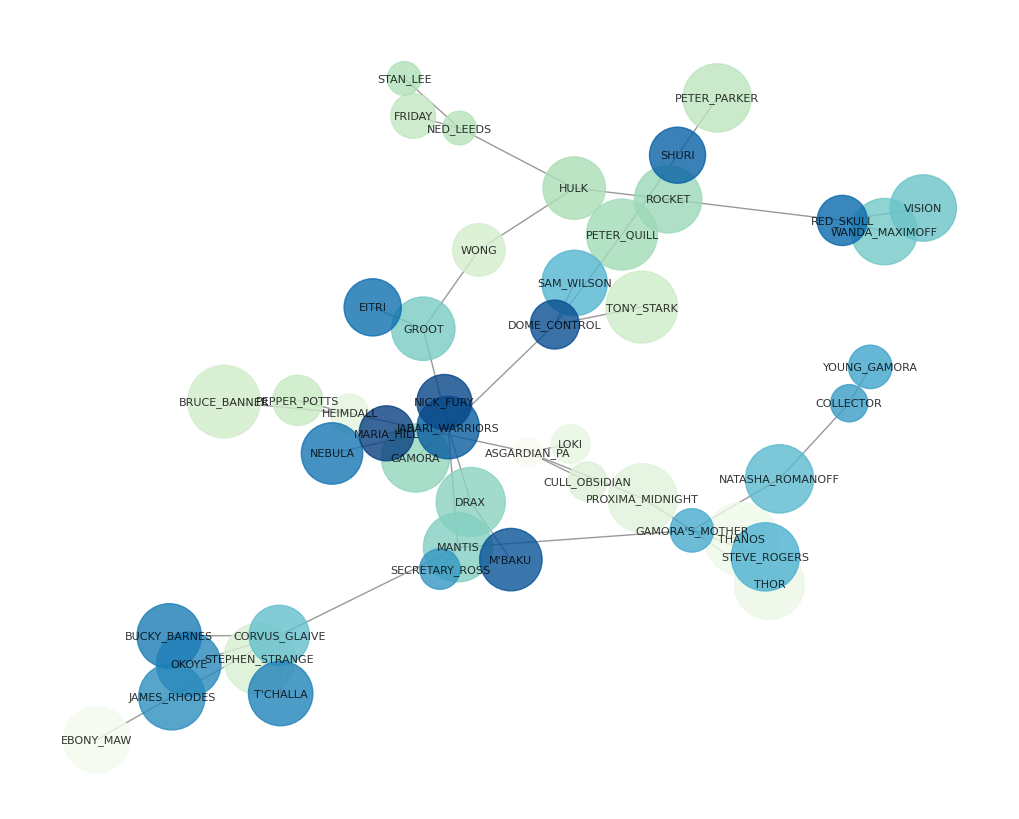

In [58]:
T = nx.minimum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])


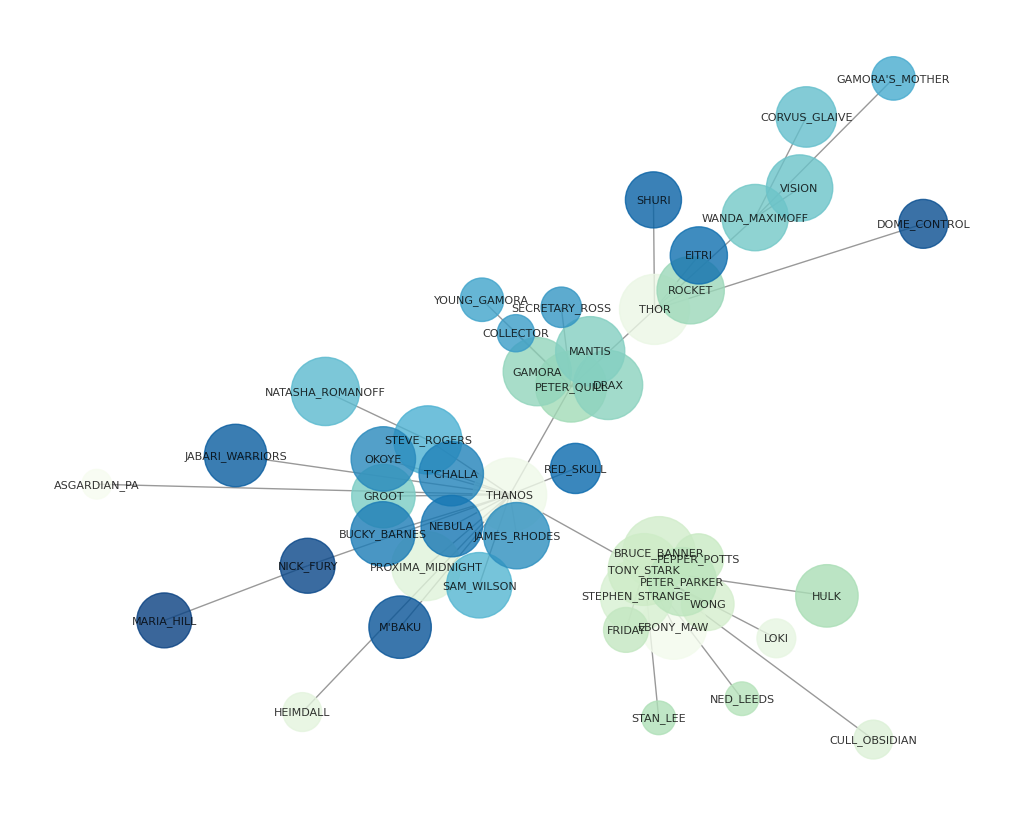

In [59]:
T = nx.maximum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])

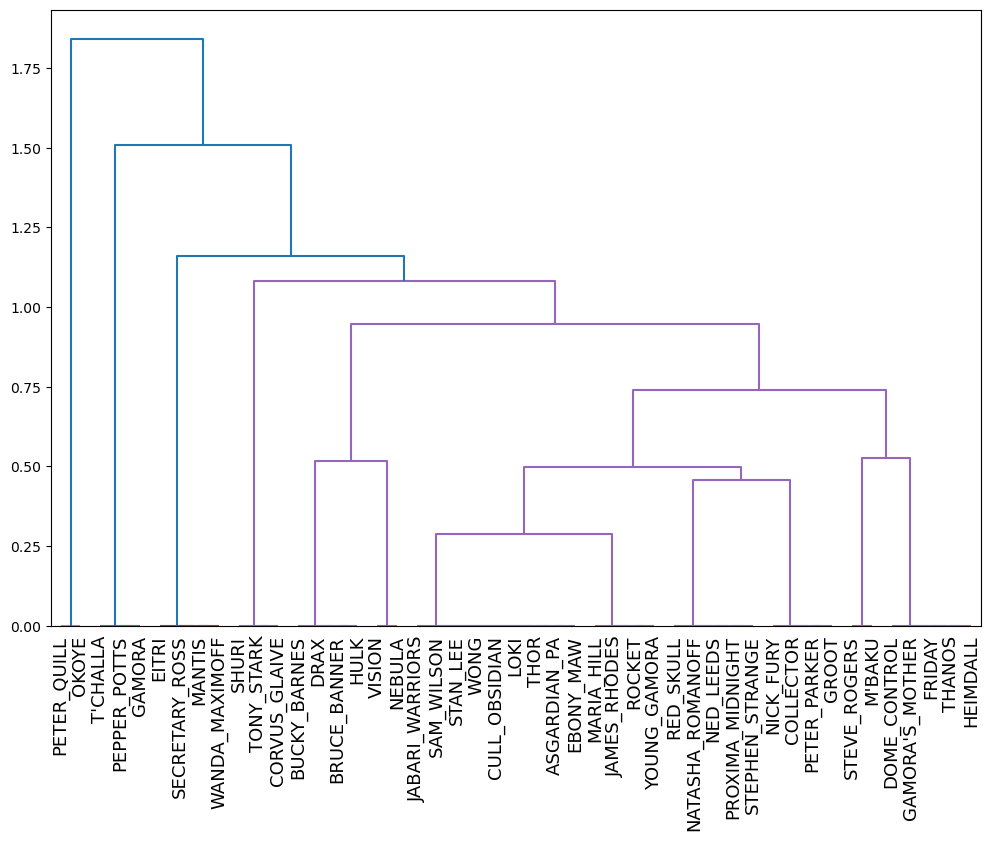

In [60]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

sd    = distance.squareform(np.log(1+interactions_characters))
h     = hierarchy.average(sd)
fig   = plt.figure(figsize = (12, 8))
ax    = fig.add_subplot(111)

h2    = hierarchy.dendrogram(h,labels=character_list,color_threshold=1.1)
ax.tick_params(axis='x', rotation=90, labelsize=13)

# Sentiment analysis

## VADER

In [61]:
vader = script.copy()
vader

lineNum     character                                               line  \
0          1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1          2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2          3        THANOS  I know what it's like to lose. To feel so desp...   
3          4          THOR                                 You talk too much.   
4          5        THANOS  The Tesseract, or your brother's head. I assum...   
..       ...           ...                                                ...   
934      935     NICK FURY                                         They okay?   
935      936    MARIA HILL                               There's no one here.   
936      937     NICK FURY                            Call Control. Code Red.   
937      938    MARIA HILL                                              Nick?   
938      939     NICK FURY                            Hill? Oh, no. Motherf--   

                                            clean_line  \
0    This is the Asgardian refugee vessel Statesman...   
1    Hear me and rejoice You have had the privilege...   
2    I know what its like to lose To feel so desper...   
3                                    You talk too much   
4    The Tesseract or your brothers head I assume y...   
..                                                 ...   
934                                          They okay   
935                                 Theres no one here   
936                              Call Control Code Red   
937                                               Nick   
938                                 Hill Oh no Motherf   

                                            POS tagged  \
0    [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1    [(Hear, None), (rejoice, v), (privilege, n), (...   
2    [(know, v), (like, n), (lose, v), (feel, v), (...   
3                               [(talk, v), (much, a)]   
4    [(Tesseract, n), (brothers, n), (head, v), (as...   
..                                                 ...   
934                                        [(okay, v)]   
935                            [(Theres, v), (one, n)]   
936     [(Call, v), (Control, n), (Code, n), (Red, n)]   
937                                        [(Nick, n)]   
938                 [(Hill, n), (Oh, n), (Motherf, n)]   

                                                 Lemma  
0      Asgardian refugee vessel Statesman assault r...  
1      Hear rejoice privilege save Great Titan may ...  
2      know like lose feel desperately youre right ...  
3                                            talk much  
4             Tesseract brother head assume preference  
..                                                 ...  
934                                               okay  
935                                         Theres one  
936                              Call Control Code Red  
937                                               Nick  
938                                    Hill Oh Motherf  

[939 rows x 6 columns]

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

vader['VaderSentiment'] = vader['Lemma'].apply(vadersentimentanalysis)
    
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

vader['Vader Analysis'] = vader['VaderSentiment'].apply(vader_analysis)
vader.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  VaderSentiment  \
0    Asgardian refugee vessel Statesman assault r...         -0.9287   
1    Hear rejoice privilege save Great Titan may ...          0.7783   
2    know like lose feel desperately youre right ...         -0.9100   
3                                          talk much          0.0000   
4           Tesseract brother head assume preference          0.0000   

  Vader Analysis  
0       Negative  
1       Positive  
2       Negative  
3        Neutral  
4        Neutral

In [63]:
# Rolling average for smoothing 
vader['smooVader'] = vader['VaderSentiment'].rolling(5, min_periods=1).mean()
vader.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  VaderSentiment  \
0    Asgardian refugee vessel Statesman assault r...         -0.9287   
1    Hear rejoice privilege save Great Titan may ...          0.7783   
2    know like lose feel desperately youre right ...         -0.9100   
3                                          talk much          0.0000   
4           Tesseract brother head assume preference          0.0000   

  Vader Analysis  smooVader  
0       Negative  -0.928700  
1       Positive  -0.075200  
2       Negative  -0.353467  
3        Neutral  -0.265100  
4        Neutral  -0.212080

In [64]:
# Noise removal
# https://machinelearning1.wordpress.com/2014/07/13/signal-processing-apply-median-filters-python/
import scipy.signal as sp
def apply_filter(df):
    print('Before applying noise-filter \n', df.describe())    
#     n = 20 # larger n, smoother curve
#     b = [1.0/n]*n
#     a = 1
    df['noise_removed'] = sp.medfilt(df['smooVader'], 15)    
    print('After applying noise-filter \n', df.describe())
    return df
vader = apply_filter(vader)

Before applying noise-filter 
           lineNum  VaderSentiment   smooVader
count  939.000000      939.000000  939.000000
mean   470.000000        0.025590    0.024543
std    271.210251        0.341124    0.166018
min      1.000000       -0.960200   -0.928700
25%    235.500000        0.000000   -0.081520
50%    470.000000        0.000000    0.029820
75%    704.500000        0.240750    0.125220
max    939.000000        0.913600    0.449980
After applying noise-filter 
           lineNum  VaderSentiment   smooVader  noise_removed
count  939.000000      939.000000  939.000000     939.000000
mean   470.000000        0.025590    0.024543       0.025832
std    271.210251        0.341124    0.166018       0.097413
min      1.000000       -0.960200   -0.928700      -0.202080
25%    235.500000        0.000000   -0.081520      -0.035140
50%    470.000000        0.000000    0.029820       0.029820
75%    704.500000        0.240750    0.125220       0.086200
max    939.000000        0.913600    

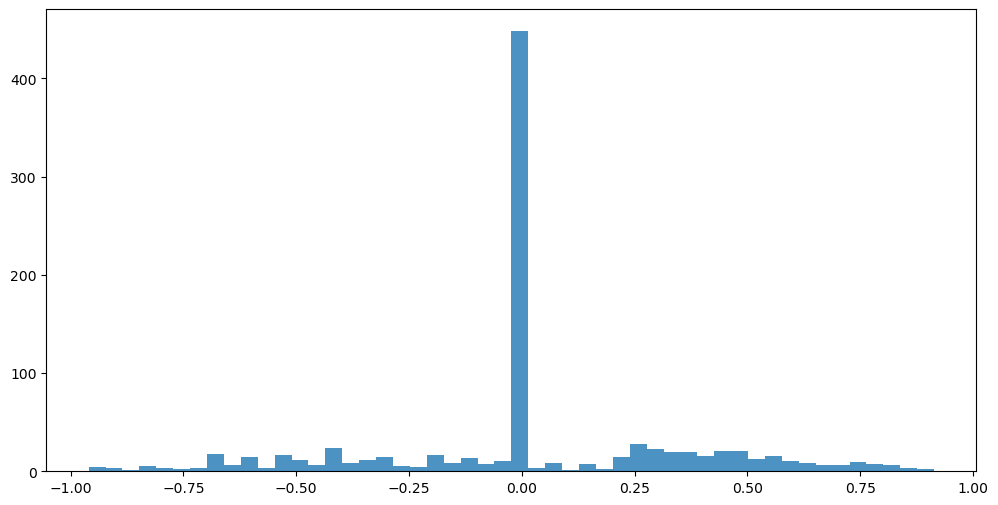

In [65]:
# Plot histogram
import matplotlib as mpl
mpl.style.use('default')
plt.figure(figsize=(12, 6))
plt.hist(vader['VaderSentiment'], bins=50, alpha=0.8)
plt.show()

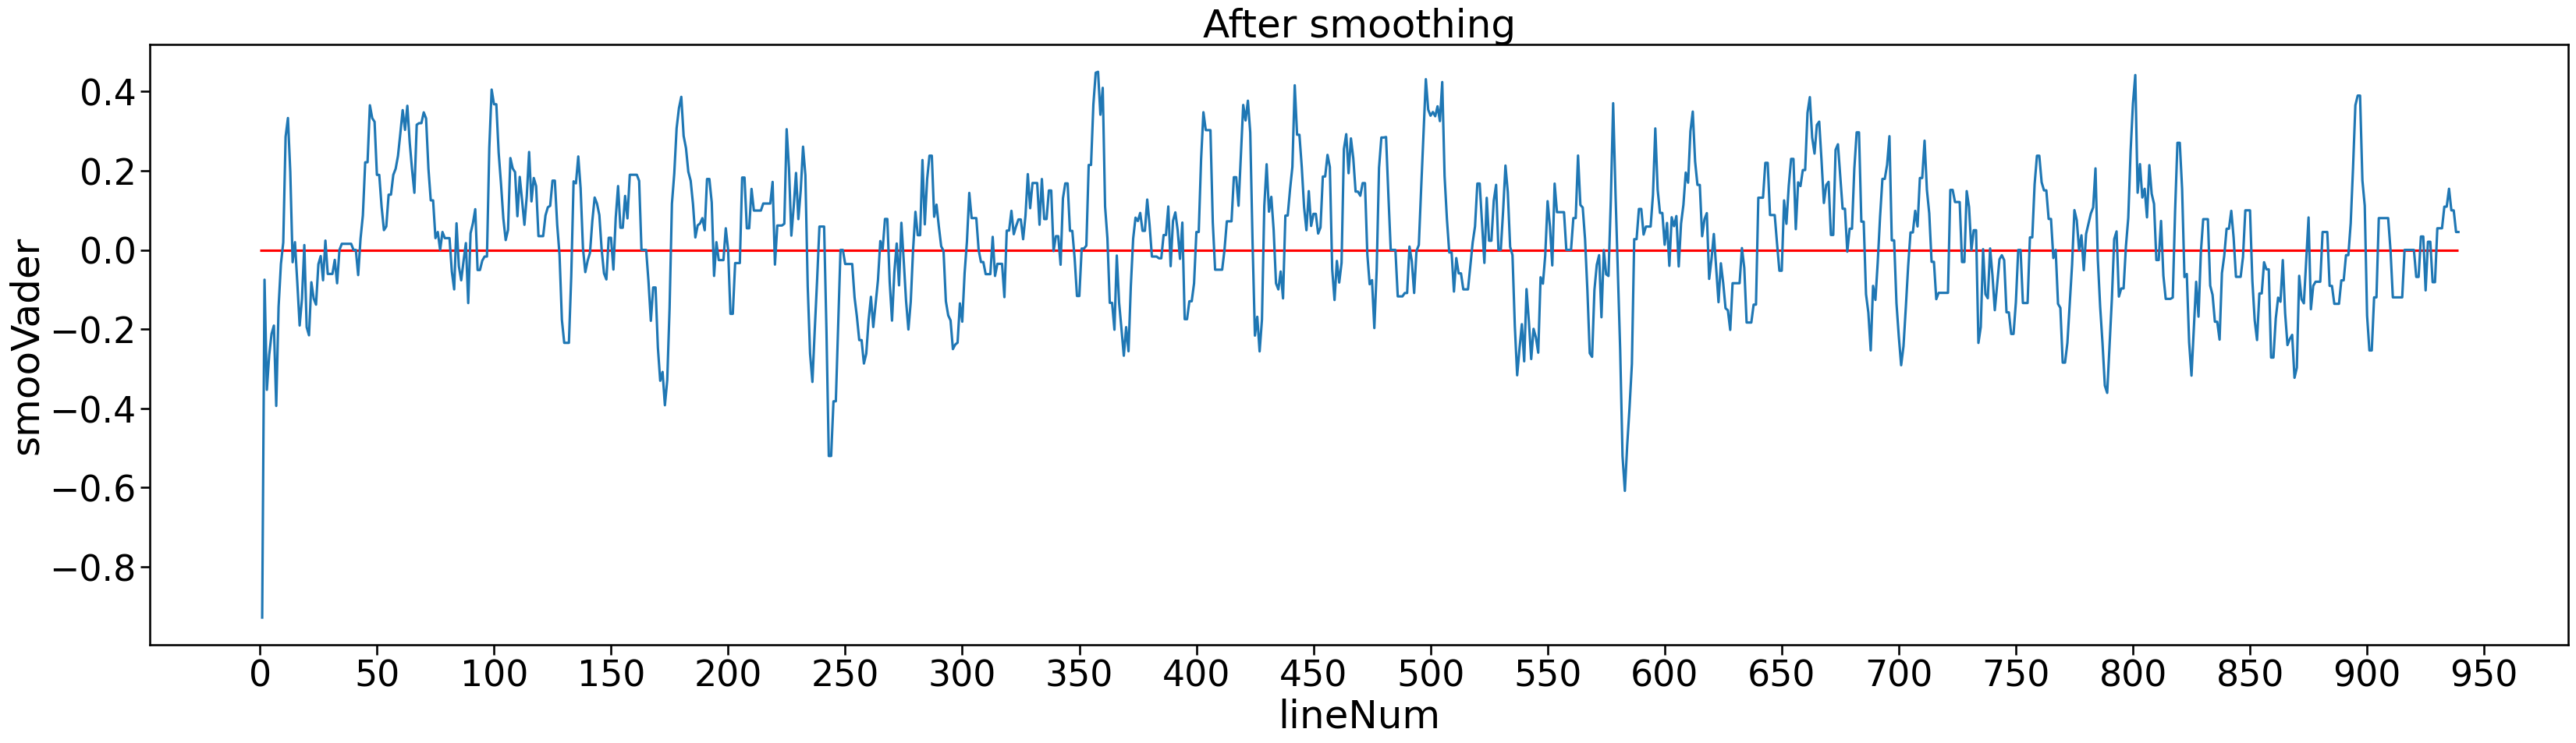

In [66]:
# plt.plot(fin_df['lineNum'], fin_df['VadarSentiment'])

import seaborn as sns

plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='smooVader', data=vader)
plt.title('After smoothing')
plt.xticks(np.arange(0, 1000, 50))
plt.hlines(0, 0, vader.lineNum.max(), color='red')
plt.show()

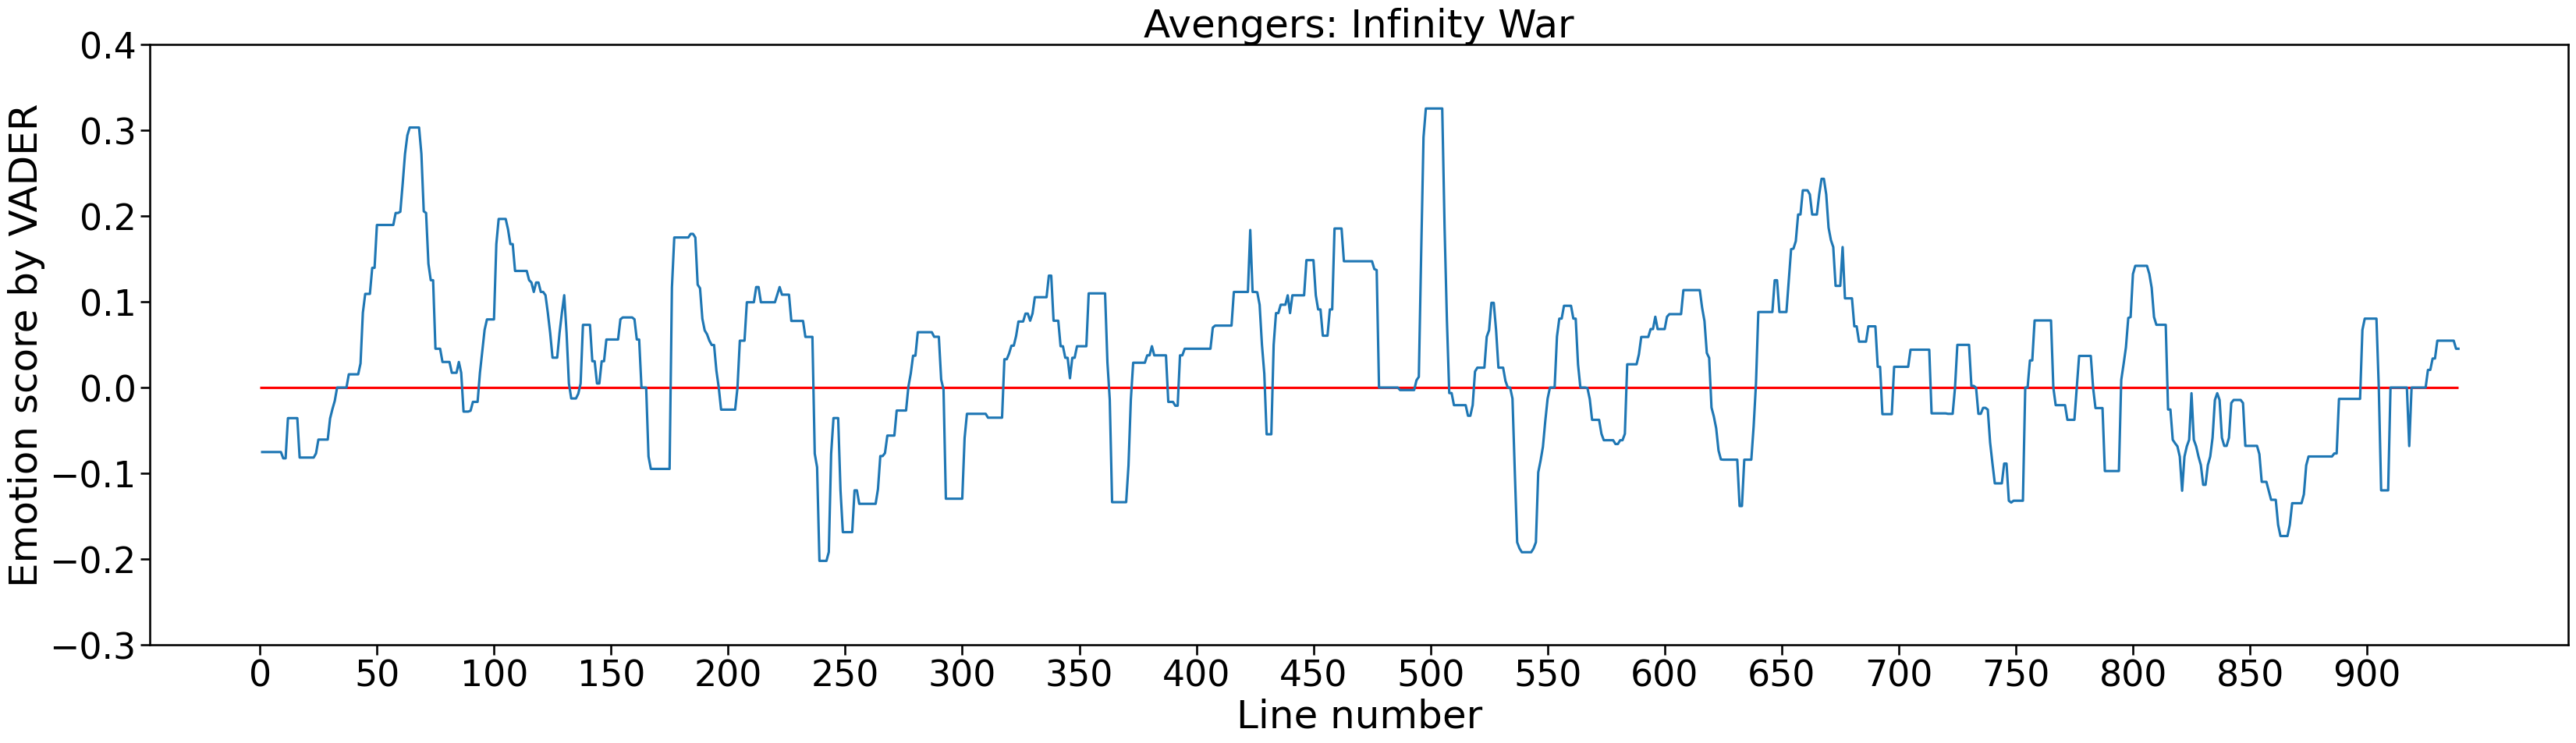

In [67]:
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='noise_removed', data=vader)
plt.title('Avengers: Infinity War')
plt.xlabel('Line number')
plt.ylabel('Emotion score by VADER')
plt.ylim([-0.3, 0.4])
plt.xticks(np.arange(0, vader.lineNum.max(), 50))
plt.hlines(0, 0, vader.lineNum.max(), color='red')
plt.show()

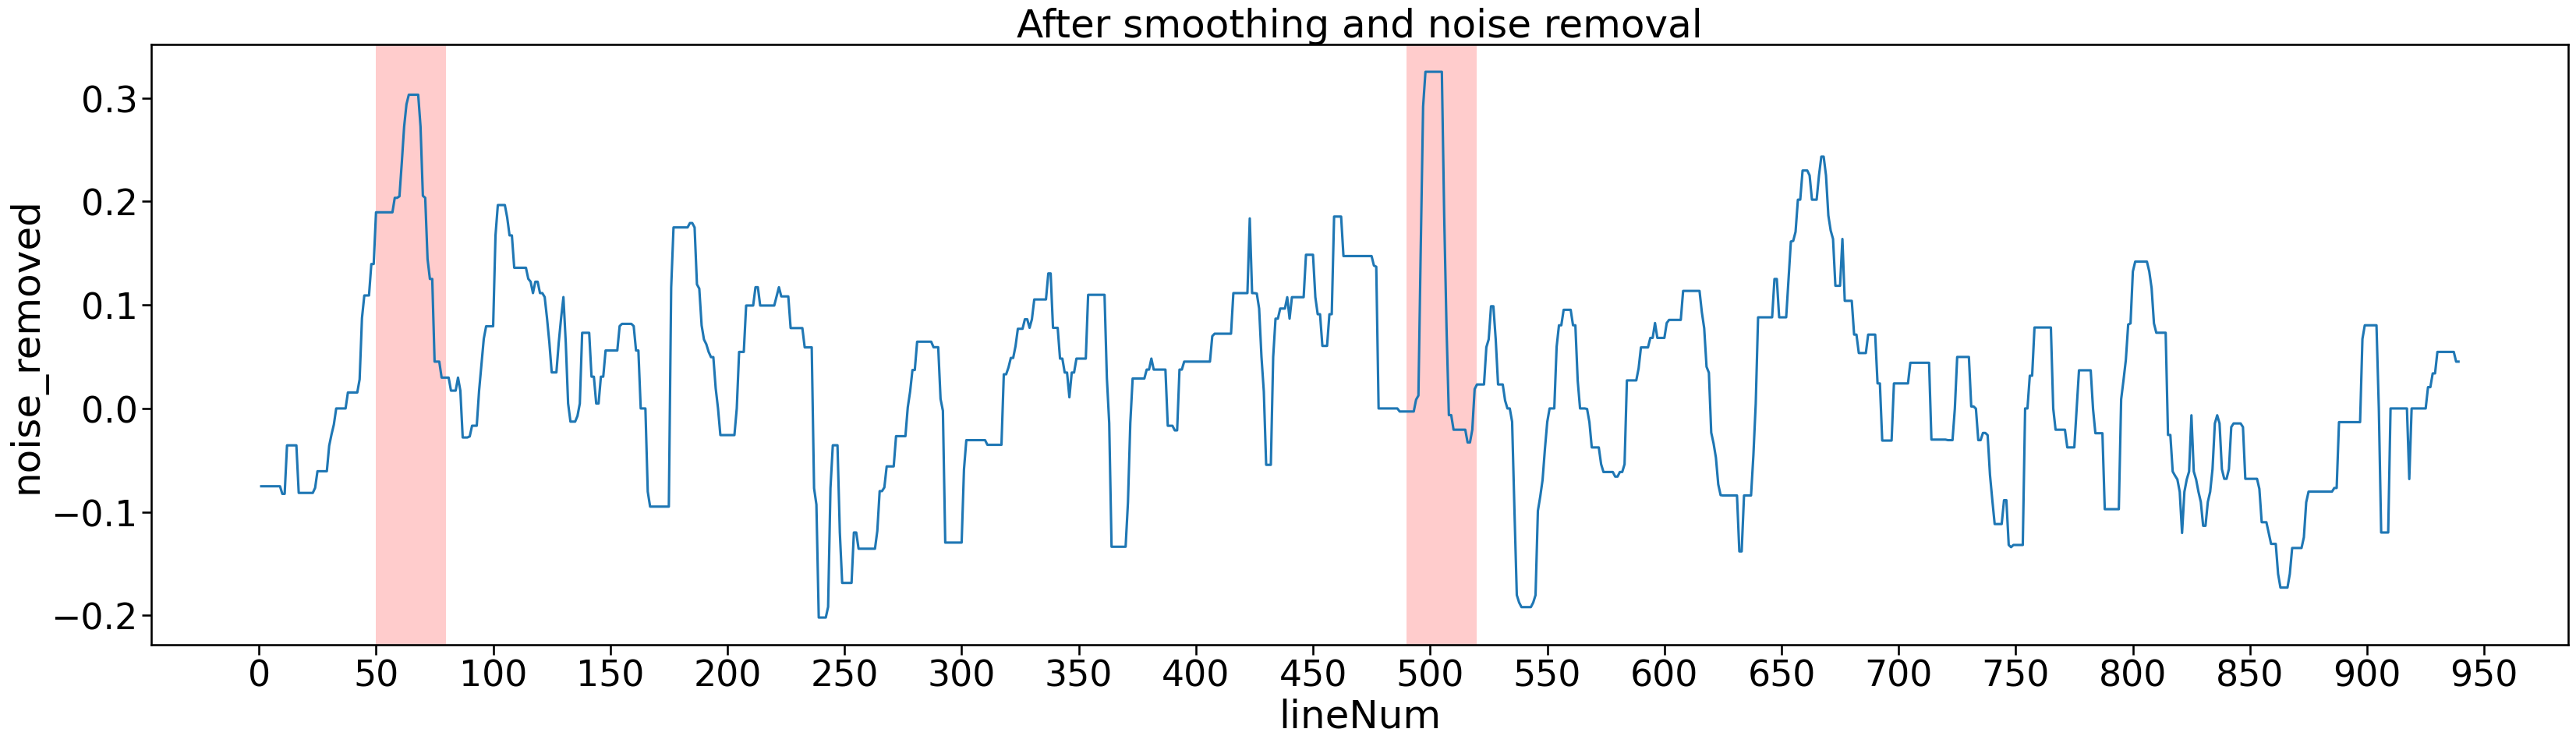

In [68]:
# Plot 
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
plot = sns.lineplot(x='lineNum', y='noise_removed', data=vader)
plt.title('After smoothing and noise removal')
plt.xticks(np.arange(0, 1000, 50))

plot.axvspan(490, 520, facecolor='red', alpha=.2)
plot.axvspan(50, 80, facecolor='red', alpha=.2)
plt.show()

## Test Blob

In [69]:
blob = script.copy()
blob

lineNum     character                                               line  \
0          1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1          2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2          3        THANOS  I know what it's like to lose. To feel so desp...   
3          4          THOR                                 You talk too much.   
4          5        THANOS  The Tesseract, or your brother's head. I assum...   
..       ...           ...                                                ...   
934      935     NICK FURY                                         They okay?   
935      936    MARIA HILL                               There's no one here.   
936      937     NICK FURY                            Call Control. Code Red.   
937      938    MARIA HILL                                              Nick?   
938      939     NICK FURY                            Hill? Oh, no. Motherf--   

                                            clean_line  \
0    This is the Asgardian refugee vessel Statesman...   
1    Hear me and rejoice You have had the privilege...   
2    I know what its like to lose To feel so desper...   
3                                    You talk too much   
4    The Tesseract or your brothers head I assume y...   
..                                                 ...   
934                                          They okay   
935                                 Theres no one here   
936                              Call Control Code Red   
937                                               Nick   
938                                 Hill Oh no Motherf   

                                            POS tagged  \
0    [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1    [(Hear, None), (rejoice, v), (privilege, n), (...   
2    [(know, v), (like, n), (lose, v), (feel, v), (...   
3                               [(talk, v), (much, a)]   
4    [(Tesseract, n), (brothers, n), (head, v), (as...   
..                                                 ...   
934                                        [(okay, v)]   
935                            [(Theres, v), (one, n)]   
936     [(Call, v), (Control, n), (Code, n), (Red, n)]   
937                                        [(Nick, n)]   
938                 [(Hill, n), (Oh, n), (Motherf, n)]   

                                                 Lemma  
0      Asgardian refugee vessel Statesman assault r...  
1      Hear rejoice privilege save Great Titan may ...  
2      know like lose feel desperately youre right ...  
3                                            talk much  
4             Tesseract brother head assume preference  
..                                                 ...  
934                                               okay  
935                                         Theres one  
936                              Call Control Code Red  
937                                               Nick  
938                                    Hill Oh Motherf  

[939 rows x 6 columns]

In [70]:
# TestBlob
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

blob['Subjectivity'] = blob['Lemma'].apply(getSubjectivity) 
blob['Polarity'] = blob['Lemma'].apply(getPolarity) 
blob['Analysis'] = blob['Polarity'].apply(analysis)
blob.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  Subjectivity  Polarity  \
0    Asgardian refugee vessel Statesman assault r...      0.350000 -0.350000   
1    Hear rejoice privilege save Great Titan may ...      0.283333  0.366667   
2    know like lose feel desperately youre right ...      0.708929 -0.328571   
3                                          talk much      0.200000  0.200000   
4           Tesseract brother head assume preference      0.000000  0.000000   

   Analysis  
0  Negative  
1  Positive  
2  Negative  
3  Positive  
4   Neutral

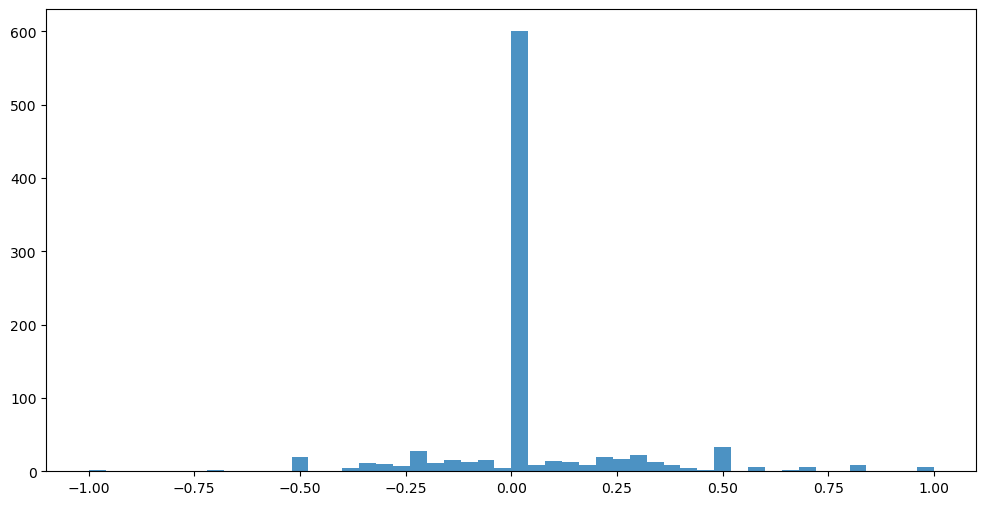

In [71]:
# Plot histogram
plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.hist(blob['Polarity'], bins=50, alpha=0.8)
plt.show()

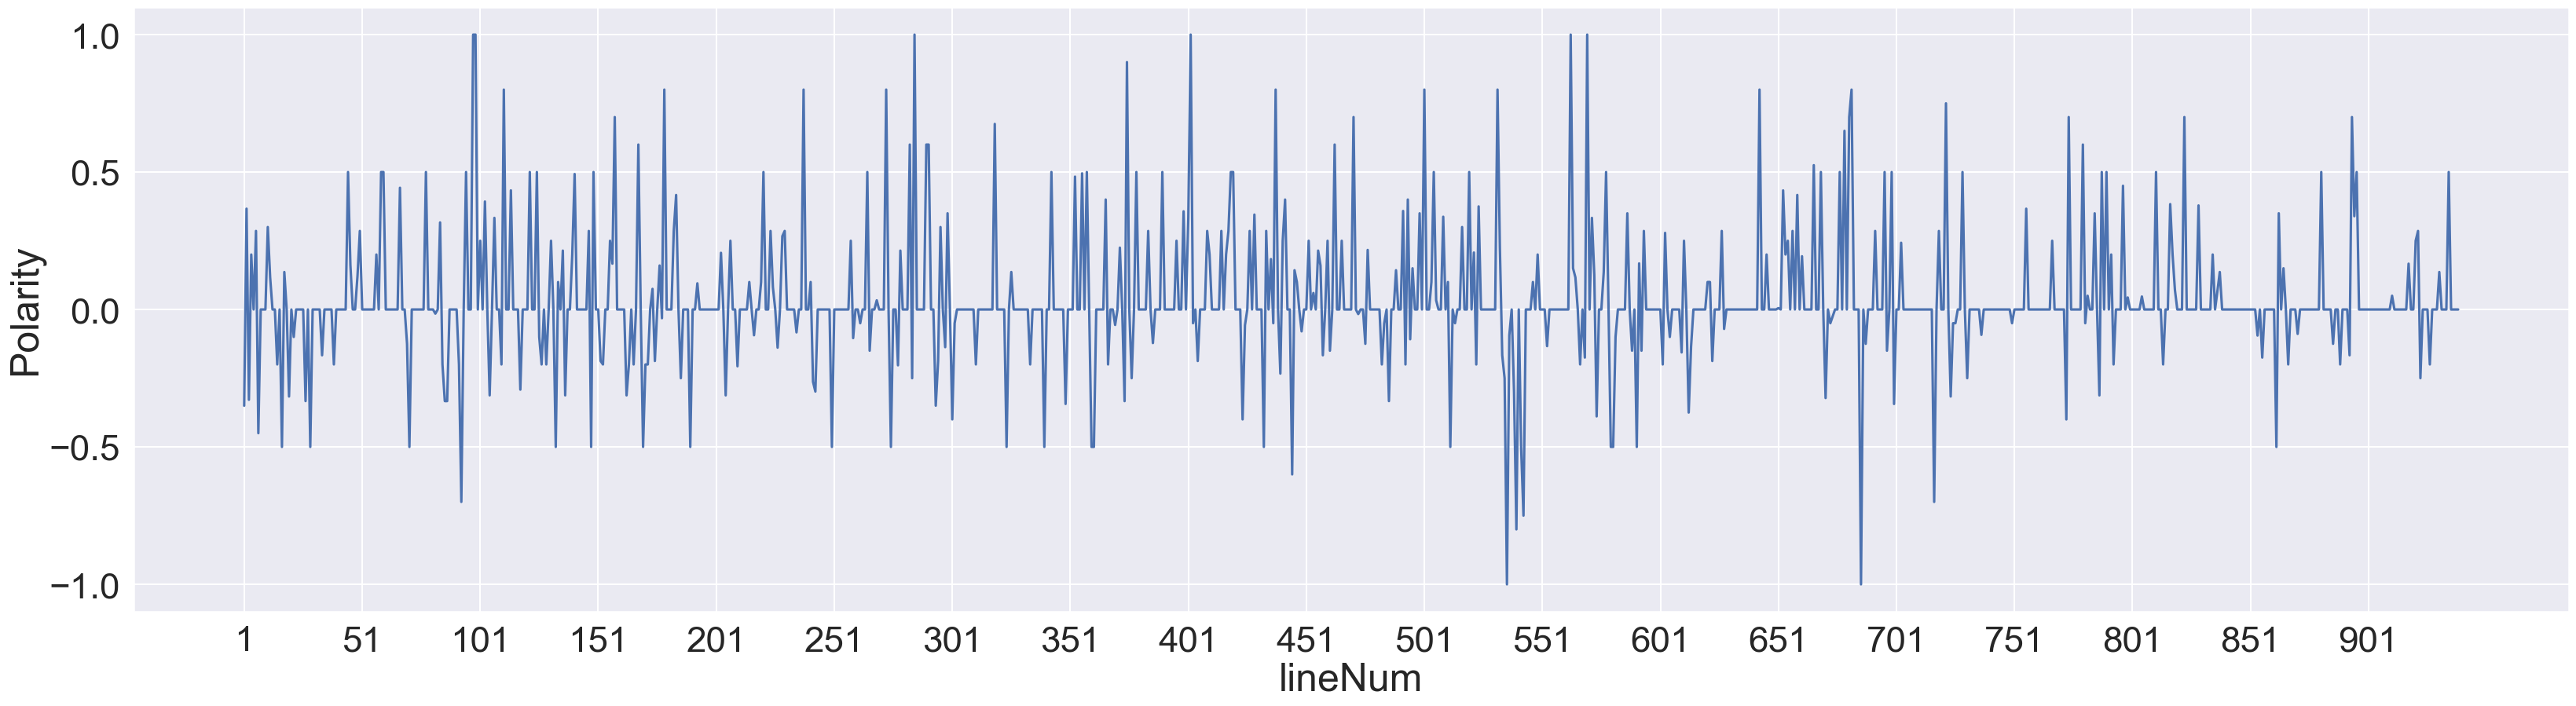

In [72]:
plt.figure(figsize=(40, 10))
sns.set()
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='Polarity', data=blob)
plt.xticks(np.arange(blob.lineNum.min(), blob.lineNum.max(), 50))
plt.show()

In [73]:
# Rolling average for smoothing
blob['smooPolarity'] = blob['Polarity'].rolling(5, min_periods=1).mean()
blob['smooSubjectivity'] = blob['Subjectivity'].rolling(5, min_periods=1).mean()
blob.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  Subjectivity  Polarity  \
0    Asgardian refugee vessel Statesman assault r...      0.350000 -0.350000   
1    Hear rejoice privilege save Great Titan may ...      0.283333  0.366667   
2    know like lose feel desperately youre right ...      0.708929 -0.328571   
3                                          talk much      0.200000  0.200000   
4           Tesseract brother head assume preference      0.000000  0.000000   

   Analysis  smooPolarity  smooSubjectivity  
0  Negative     -0.350000          0.350000  
1  Positive      0.008333          0.316667  
2  Negative     -0.103968          0.447421  
3  Positive     -0.027976          0.385565  
4   Neutral     -0.022381          0.308452

In [74]:
# Noise removal
# https://machinelearning1.wordpress.com/2014/07/13/signal-processing-apply-median-filters-python/
import scipy.signal as sp
def apply_filter(df):
    print('Before applying noise-filter \n', df.describe())    
#     n = 20 # larger n, smoother curve
#     b = [1.0/n]*n
#     a = 1
    df['noise_removed'] = sp.medfilt(df['smooPolarity'], 15)    
    print('After applying noise-filter \n', df.describe())
    return df
blob = apply_filter(blob)

Before applying noise-filter 
           lineNum  Subjectivity   Polarity  smooPolarity  smooSubjectivity
count  939.000000    939.000000  939.00000    939.000000        939.000000
mean   470.000000      0.212388    0.03496      0.034617          0.213161
std    271.210251      0.309379    0.23073      0.107808          0.141154
min      1.000000      0.000000   -1.00000     -0.470000          0.000000
25%    235.500000      0.000000    0.00000     -0.022857          0.107143
50%    470.000000      0.000000    0.00000      0.019643          0.201667
75%    704.500000      0.454545    0.00000      0.098899          0.309116
max    939.000000      1.000000    1.00000      0.500000          0.668571
After applying noise-filter 
           lineNum  Subjectivity   Polarity  smooPolarity  smooSubjectivity  \
count  939.000000    939.000000  939.00000    939.000000        939.000000   
mean   470.000000      0.212388    0.03496      0.034617          0.213161   
std    271.210251      0.30937

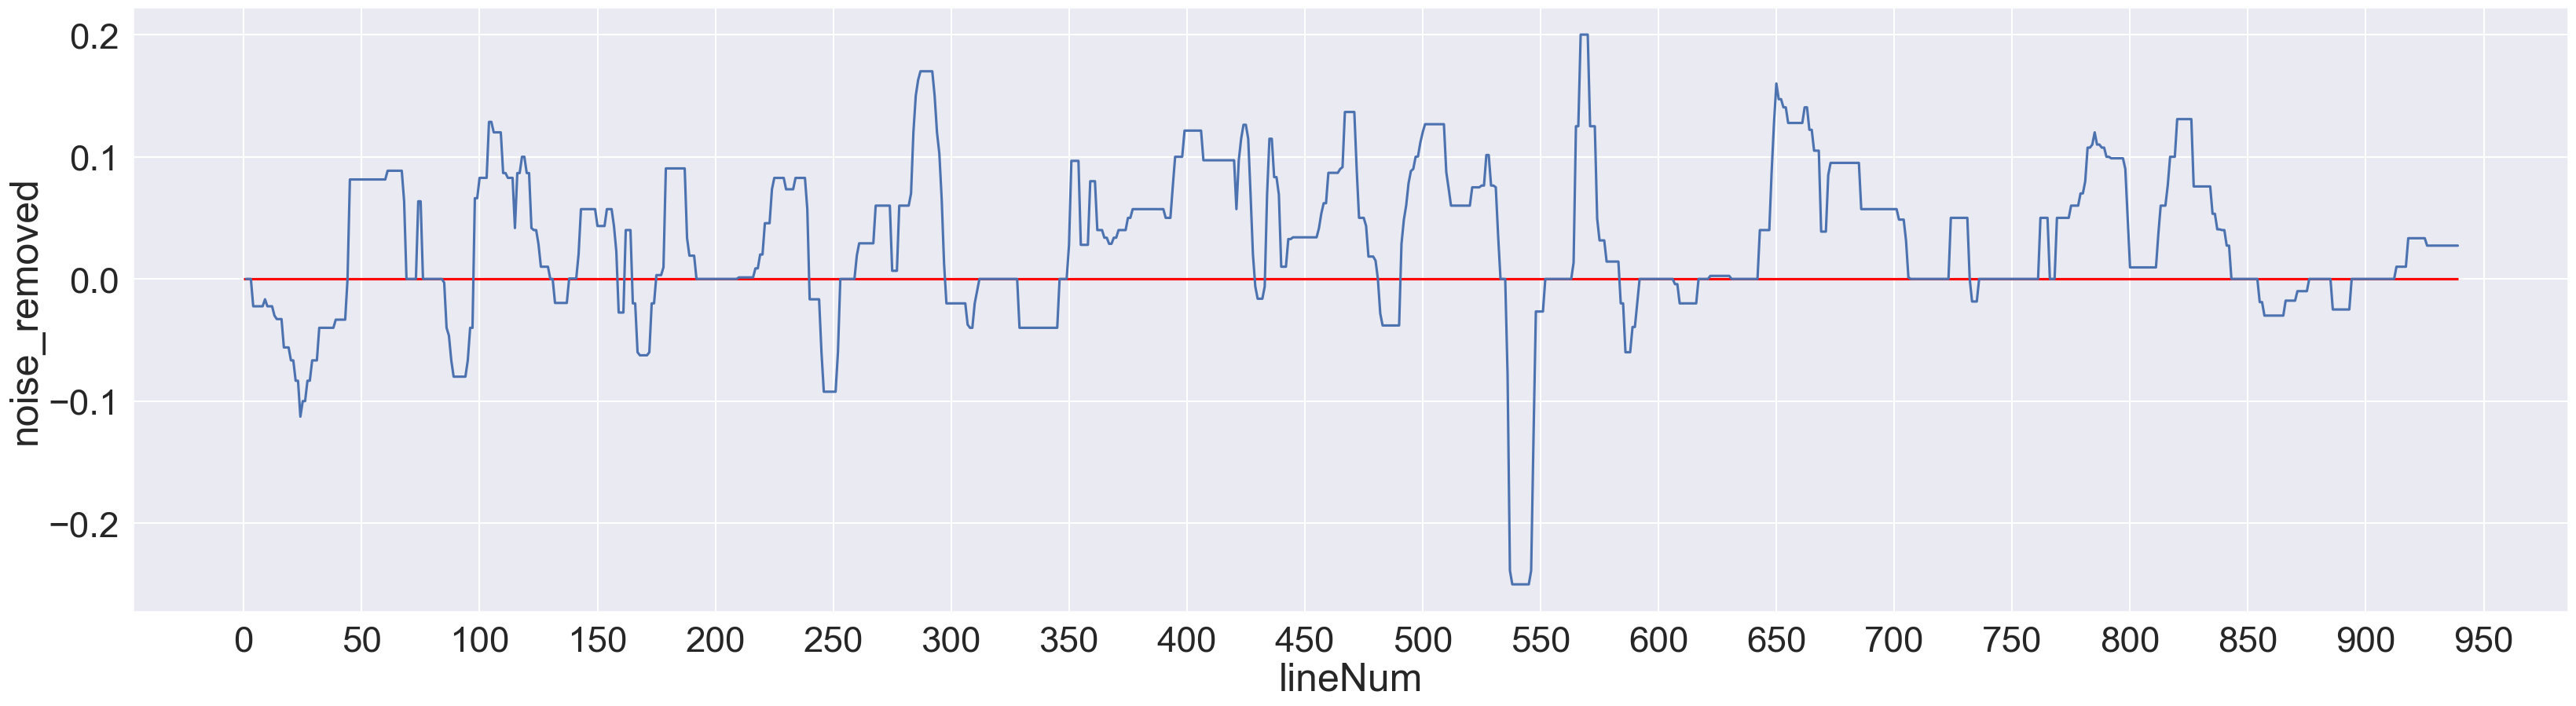

In [75]:
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='noise_removed', data=blob)
plt.hlines(0, 0, blob.lineNum.max(), color='red')
plt.xticks(np.arange(0, 1000, 50))
plt.show()

# NRCLex


## Line by line

In [76]:
from nrclex import NRCLex

In [77]:
nrc = script.copy()
nrc.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  
0    Asgardian refugee vessel Statesman assault r...  
1    Hear rejoice privilege save Great Titan may ...  
2    know like lose feel desperately youre right ...  
3                                          talk much  
4           Tesseract brother head assume preference

In [78]:
# Change the line to text_object for NRCLex
def totextobject(line):
    text_object = NRCLex(line)
    return text_object
nrc['text_object'] = nrc['Lemma'].apply(totextobject)
nrc.head(5)

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  \
0    Asgardian refugee vessel Statesman assault r...   
1    Hear rejoice privilege save Great Titan may ...   
2    know like lose feel desperately youre right ...   
3                                          talk much   
4           Tesseract brother head assume preference   

                                text_object  
0  <nrclex.NRCLex object at 0x7f9e858795b0>  
1  <nrclex.NRCLex object at 0x7f9e85879700>  
2  <nrclex.NRCLex object at 0x7f9e85879580>  
3  <nrclex.NRCLex object at 0x7f9e858795e0>  
4  <nrclex.NRCLex object at 0x7f9e85879550>

In [79]:
# NRCLex analysis for each line
for i, row in nrc.iterrows():
    freq = nrc.loc[i, 'text_object'].affect_frequencies
    for key in freq.keys():
        nrc.at[i, key] = freq[key]
        
nrc.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  \
0    Asgardian refugee vessel Statesman assault r...   
1    Hear rejoice privilege save Great Titan may ...   
2    know like lose feel desperately youre right ...   
3                                          talk much   
4           Tesseract brother head assume preference   

                                text_object      fear     anger  anticip  \
0  <nrclex.NRCLex object at 0x7f9e858795b0>  0.142857  0.214286      0.0   
1  <nrclex.NRCLex object at 0x7f9e85879700>  0.047619  0.047619      0.0   
2  <nrclex.NRCLex object at 0x7f9e85879580>  0.142857  0.142857      0.0   
3  <nrclex.NRCLex object at 0x7f9e858795e0>  0.000000  0.000000      0.0   
4  <nrclex.NRCLex object at 0x7f9e85879550>  0.000000  0.000000      0.0   

      trust  surprise  positive  negative   sadness   disgust       joy  \
0  0.071429  0.000000  0.214286  0.142857  0.142857  0.000000  0.071429   
1  0.142857  0.095238  0.190476  0.095238  0.047619  0.047619  0.142857   
2  0.000000  0.142857  0.000000  0.142857  0.142857  0.142857  0.000000   
3  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
4  0.500000  0.000000  0.500000  0.000000  0.000000  0.000000  0.000000   

   anticipation  
0           NaN  
1      0.142857  
2      0.142857  
3           NaN  
4           NaN

In [80]:
nrc = nrc.drop('anticip', axis=1)

In [81]:
def smoothing(column):
    smoothed = column.rolling(5, min_periods=1).mean()
    return smoothed

nrc['smooFear'] = smoothing(nrc['fear'])
nrc['smooAnger'] = smoothing(nrc['anger'])
nrc['smooTrust'] = smoothing(nrc['trust'])
nrc['smooSurprise'] = smoothing(nrc['surprise'])
nrc['smooPositive'] = smoothing(nrc['positive'])
nrc['smooNegative'] = smoothing(nrc['negative'])
nrc['smooSadness'] = smoothing(nrc['sadness'])
nrc['smooDisgust'] = smoothing(nrc['disgust'])
nrc['smooJoy'] = smoothing(nrc['joy'])
nrc['smooAnticipation'] = smoothing(nrc['anticipation'])

nrc.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  \
0    Asgardian refugee vessel Statesman assault r...   
1    Hear rejoice privilege save Great Titan may ...   
2    know like lose feel desperately youre right ...   
3                                          talk much   
4           Tesseract brother head assume preference   

                                text_object      fear     anger     trust  \
0  <nrclex.NRCLex object at 0x7f9e858795b0>  0.142857  0.214286  0.071429   
1  <nrclex.NRCLex object at 0x7f9e85879700>  0.047619  0.047619  0.142857   
2  <nrclex.NRCLex object at 0x7f9e85879580>  0.142857  0.142857  0.000000   
3  <nrclex.NRCLex object at 0x7f9e858795e0>  0.000000  0.000000  0.000000   
4  <nrclex.NRCLex object at 0x7f9e85879550>  0.000000  0.000000  0.500000   

   ...  smooFear  smooAnger  smooTrust  smooSurprise  smooPositive  \
0  ...  0.142857   0.214286   0.071429      0.000000      0.214286   
1  ...  0.095238   0.130952   0.107143      0.047619      0.202381   
2  ...  0.111111   0.134921   0.071429      0.079365      0.134921   
3  ...  0.083333   0.101190   0.053571      0.059524      0.351190   
4  ...  0.066667   0.080952   0.142857      0.047619      0.380952   

   smooNegative  smooSadness  smooDisgust   smooJoy  smooAnticipation  
0      0.142857     0.142857     0.000000  0.071429               NaN  
1      0.119048     0.095238     0.023810  0.107143          0.142857  
2      0.126984     0.111111     0.063492  0.071429          0.142857  
3      0.095238     0.083333     0.047619  0.053571          0.142857  
4      0.076190     0.066667     0.038095  0.042857          0.142857  

[5 rows x 27 columns]

In [82]:
# Noise filter
def apply_filter(column):   
    return sp.medfilt(column, 15)


for i in range(17,27):
    col_name = str(nrc.columns[i][4:])
    nrc.loc[:, col_name] = apply_filter(nrc.iloc[:,i])

nrc = nrc.fillna(0)
nrc.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  \
0    Asgardian refugee vessel Statesman assault r...   
1    Hear rejoice privilege save Great Titan may ...   
2    know like lose feel desperately youre right ...   
3                                          talk much   
4           Tesseract brother head assume preference   

                                text_object      fear     anger     trust  \
0  <nrclex.NRCLex object at 0x7f9e858795b0>  0.142857  0.214286  0.071429   
1  <nrclex.NRCLex object at 0x7f9e85879700>  0.047619  0.047619  0.142857   
2  <nrclex.NRCLex object at 0x7f9e85879580>  0.142857  0.142857  0.000000   
3  <nrclex.NRCLex object at 0x7f9e858795e0>  0.000000  0.000000  0.000000   
4  <nrclex.NRCLex object at 0x7f9e85879550>  0.000000  0.000000  0.500000   

   ...      Fear     Anger     Trust  Surprise  Positive  Negative   Sadness  \
0  ...  0.028571  0.028571  0.053571  0.000000  0.134921  0.028571  0.028571   
1  ...  0.028571  0.038095  0.071429  0.022222  0.202381  0.047619  0.028571   
2  ...  0.028571  0.053571  0.071429  0.028571  0.202381  0.053571  0.028571   
3  ...  0.028571  0.053571  0.107143  0.047222  0.202381  0.053571  0.028571   
4  ...  0.028571  0.053571  0.107143  0.047222  0.214286  0.053571  0.038095   

    Disgust       Joy  Anticipation  
0  0.000000  0.000000      0.111111  
1  0.023810  0.022222      0.118056  
2  0.028571  0.028571      0.118056  
3  0.038095  0.042857      0.142857  
4  0.038095  0.047222      0.142857  

[5 rows x 37 columns]

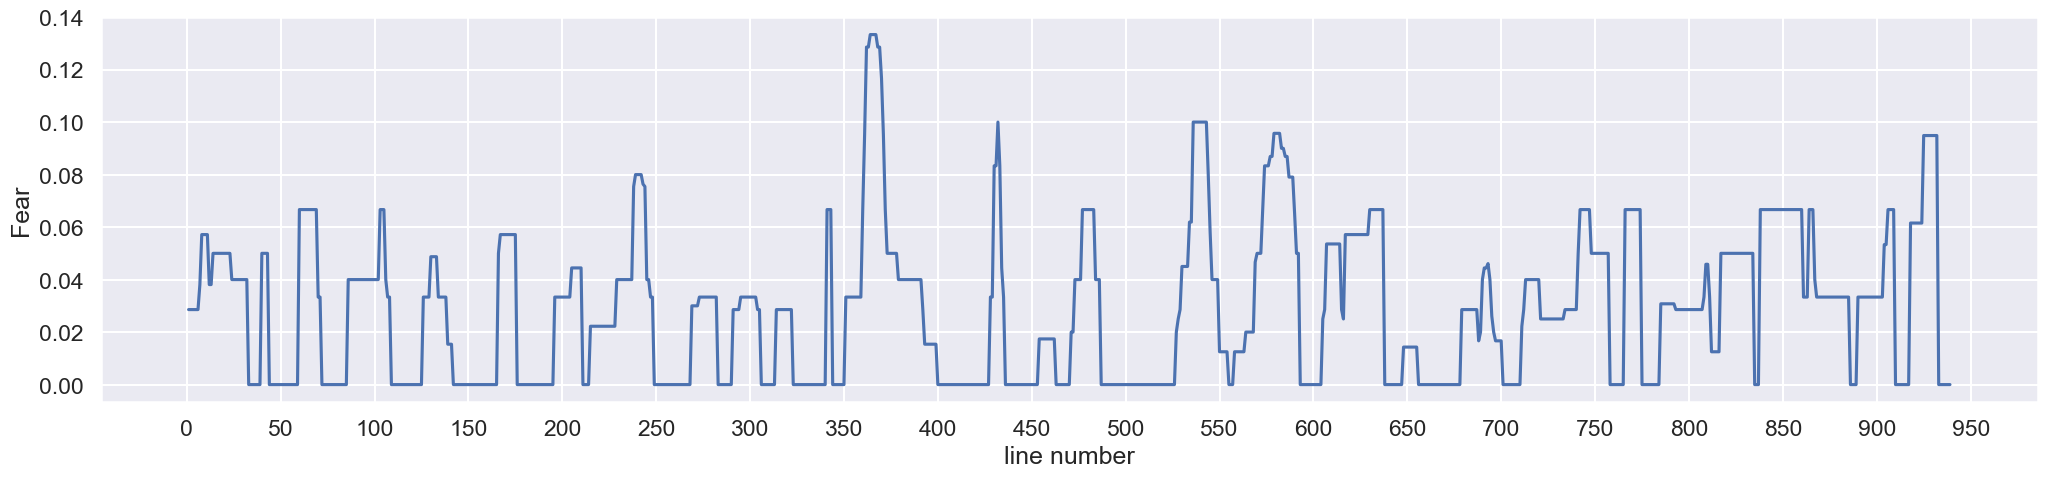

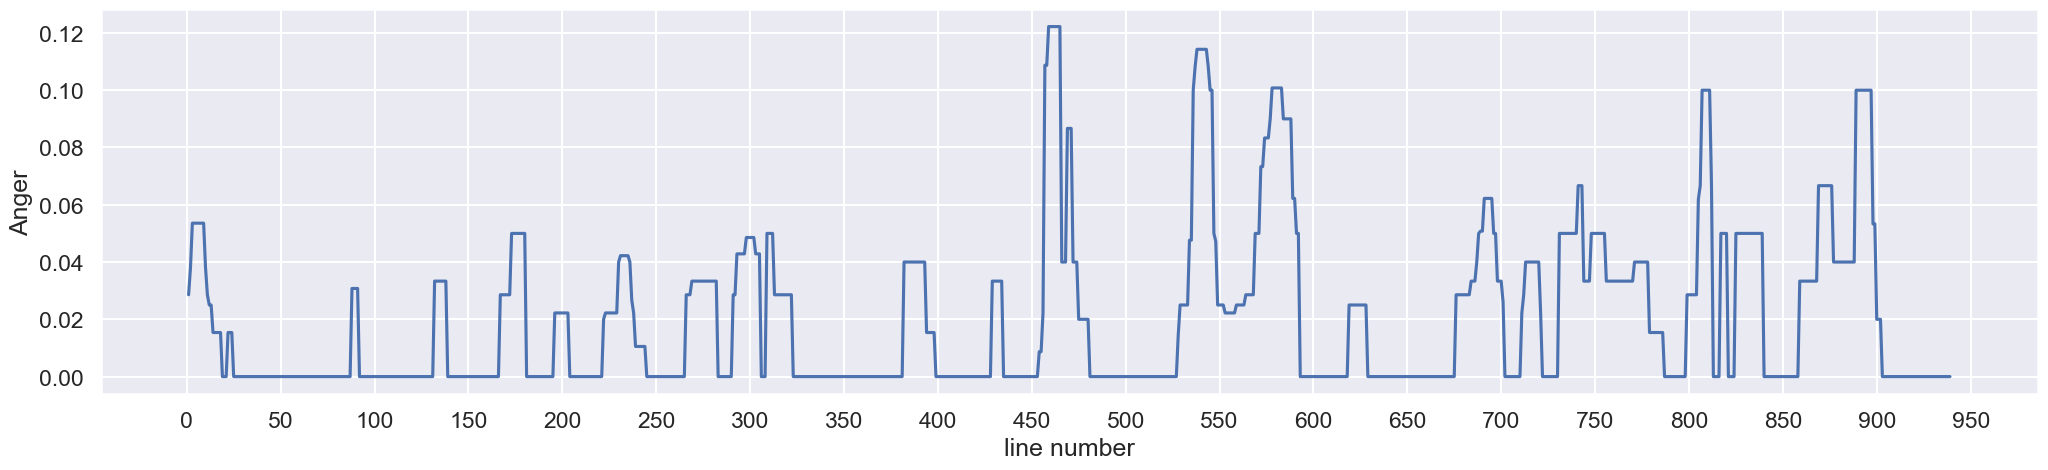

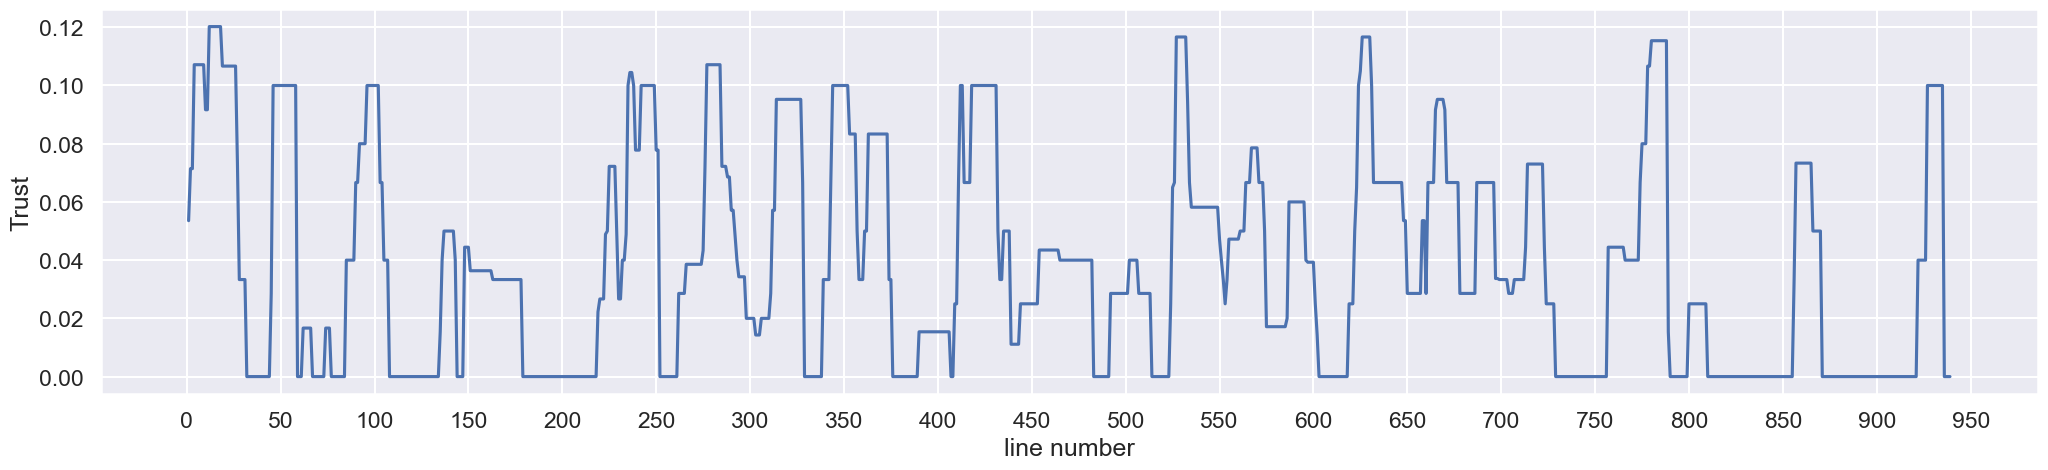

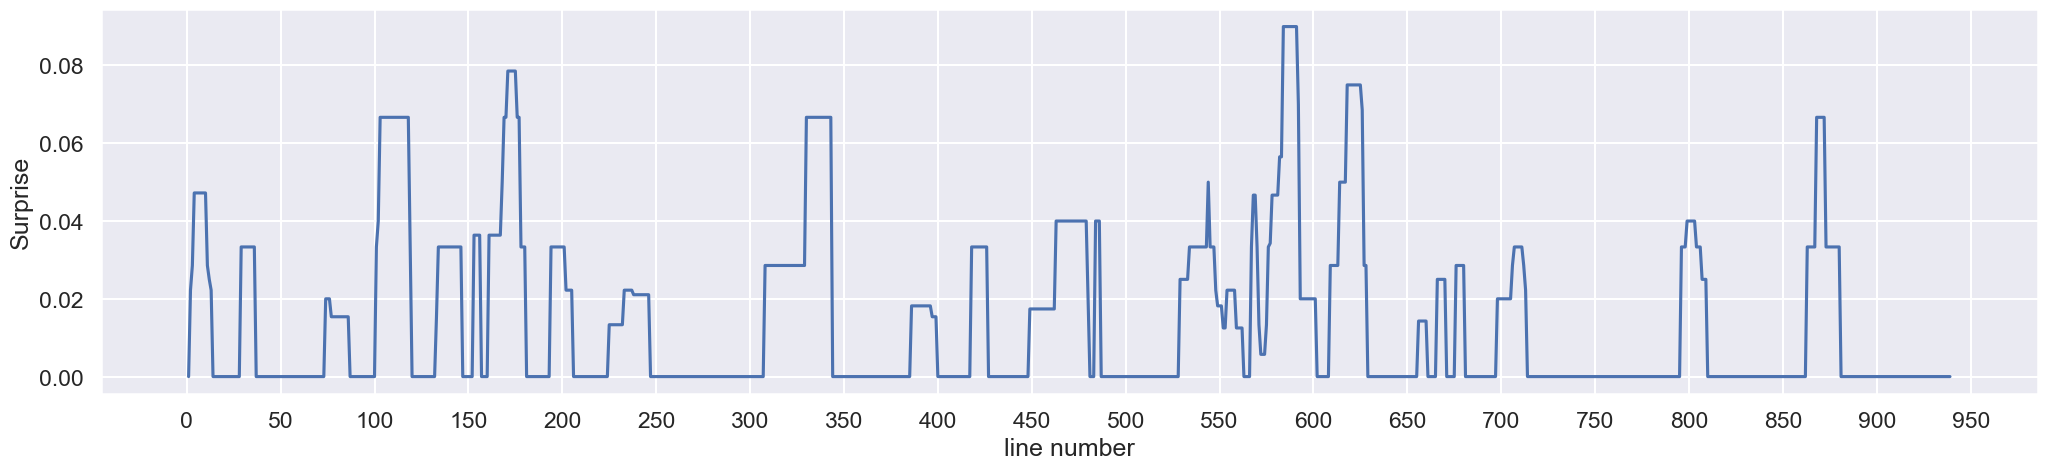

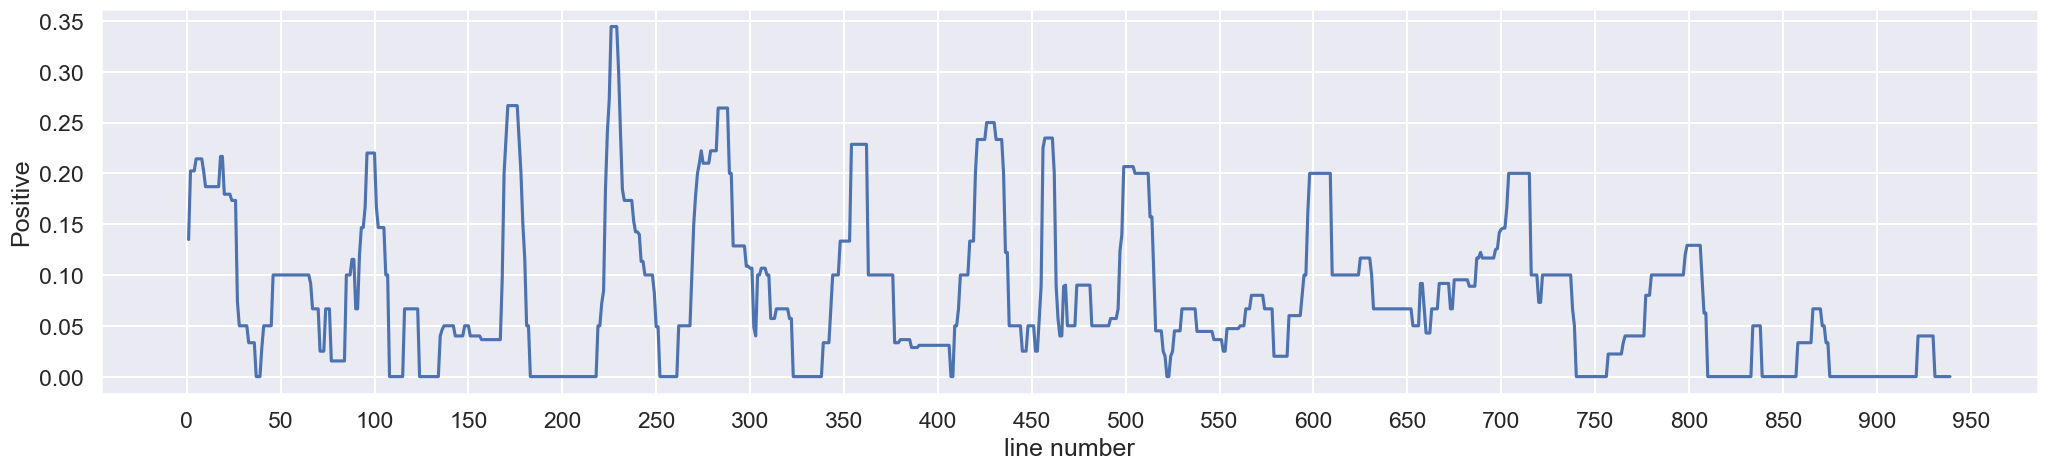

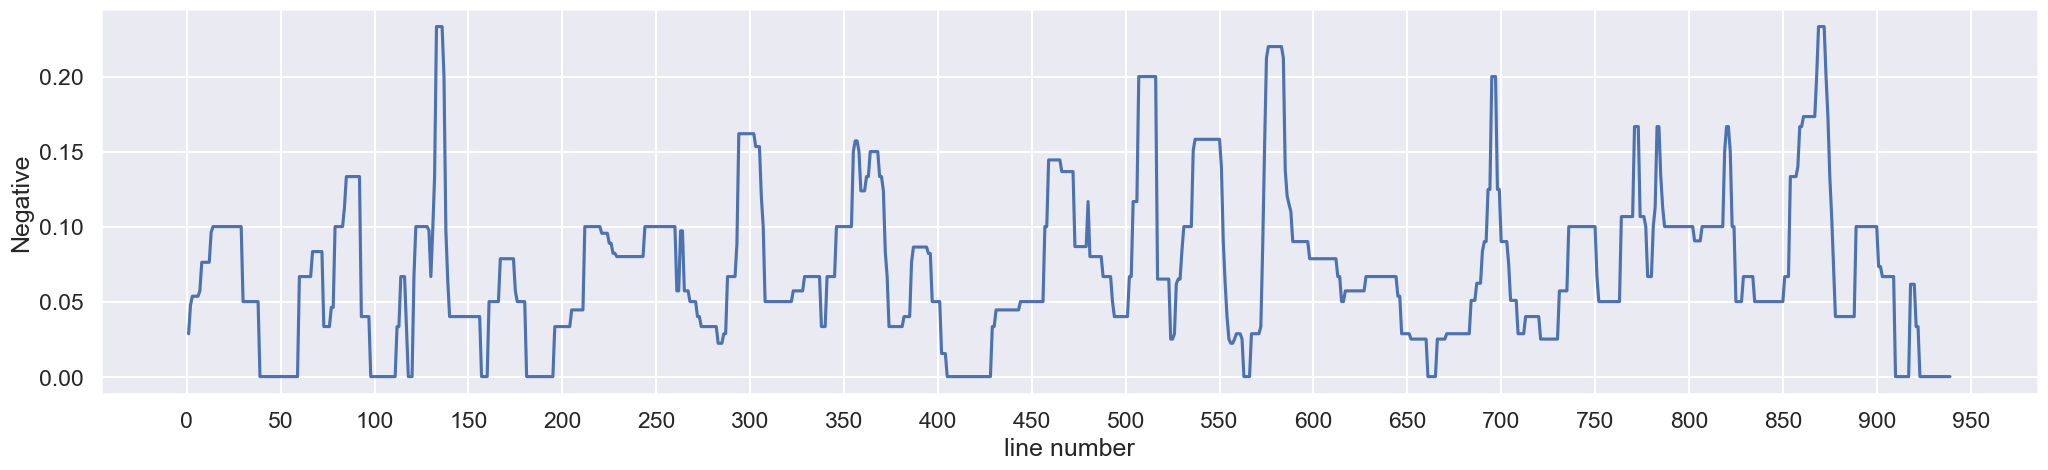

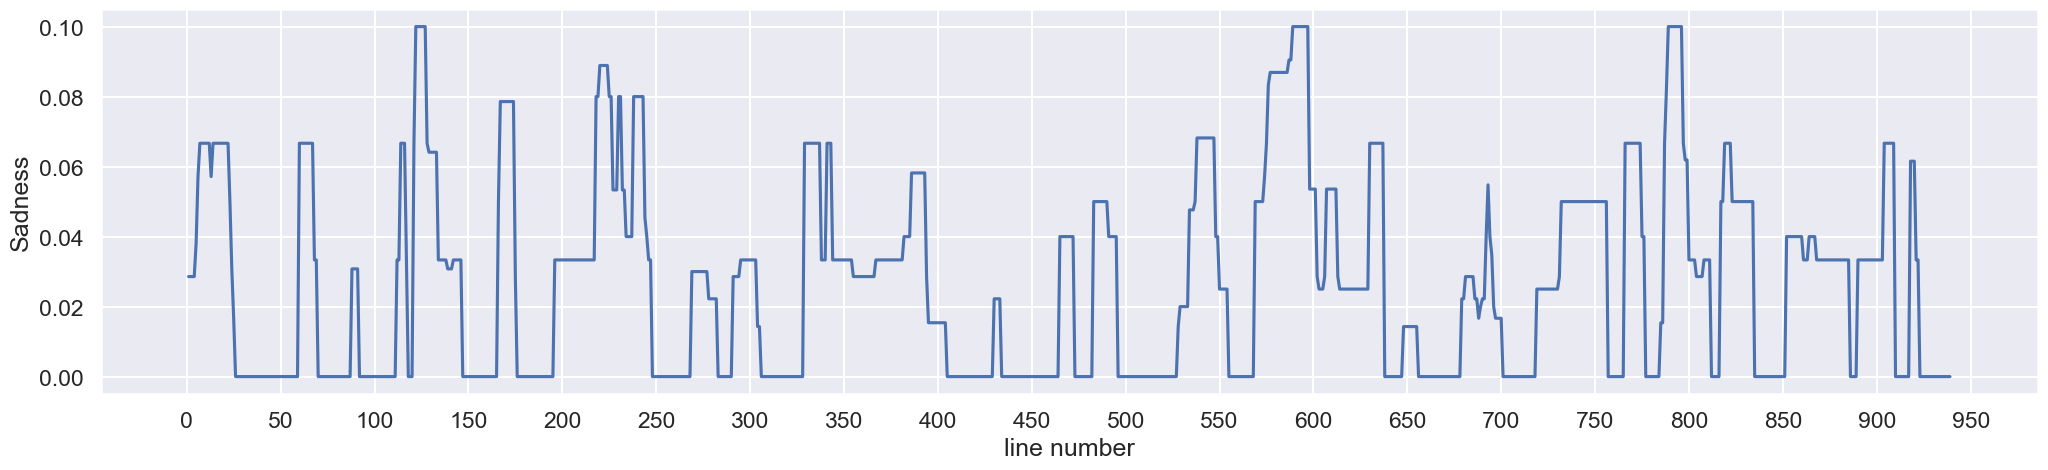

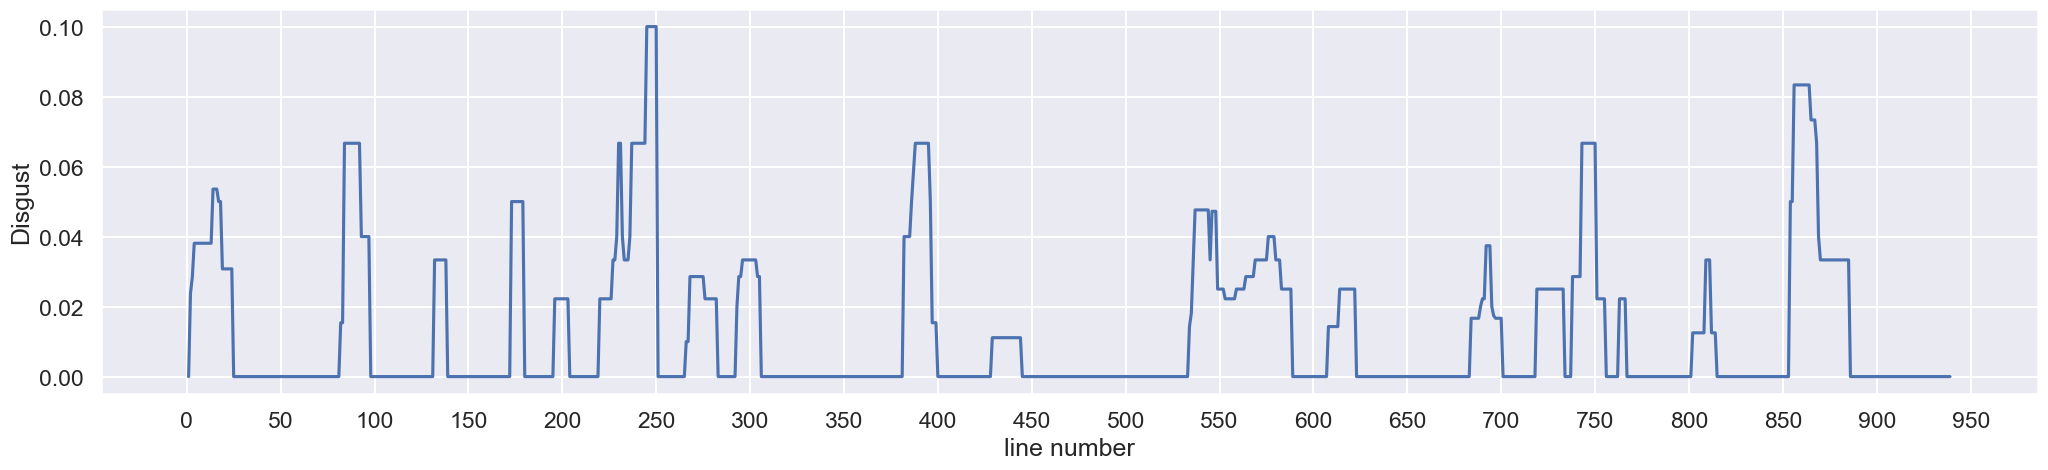

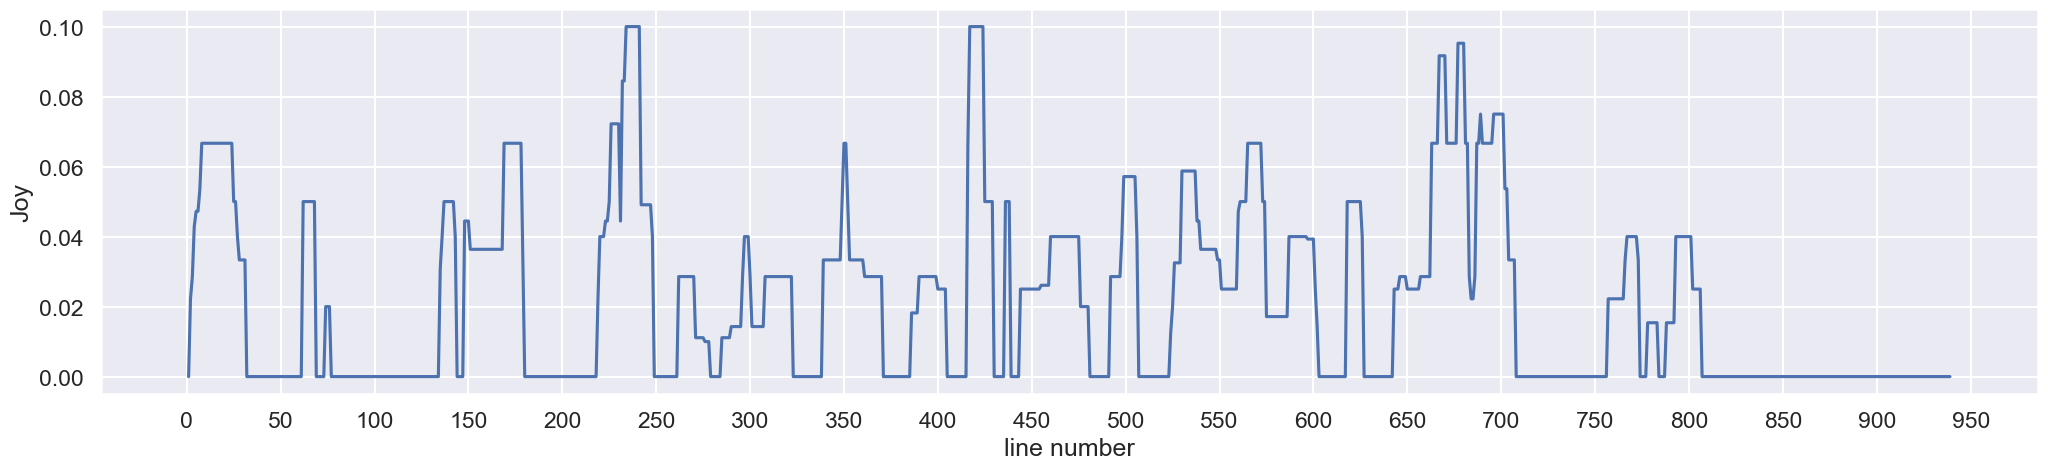

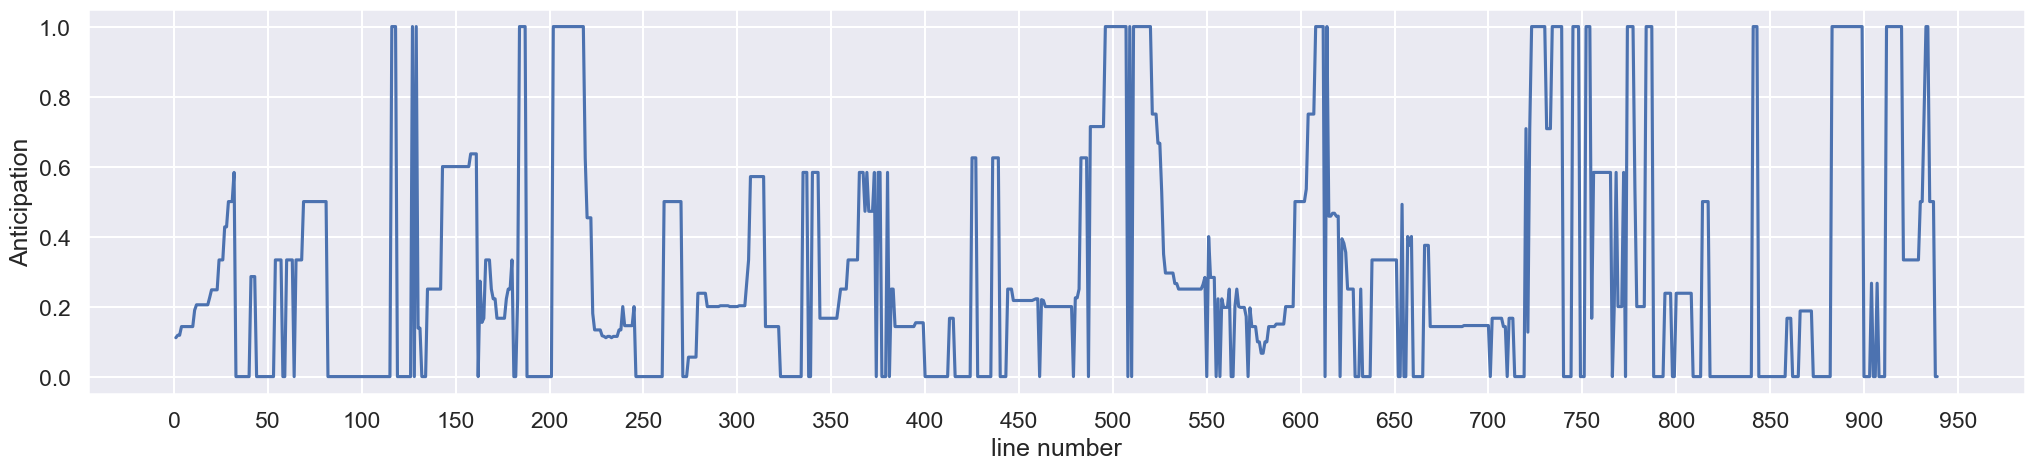

In [83]:
for i in range(27, 37):
    plt.figure(figsize=(25, 5))
    sns.set_context("talk", font_scale=1)
    plot = sns.lineplot(x = 'lineNum', y=nrc.columns[i], data=nrc)
    plt.xticks(np.arange(0, 1000, 50))
    plot.set_xlabel('line number')
    plt.show()

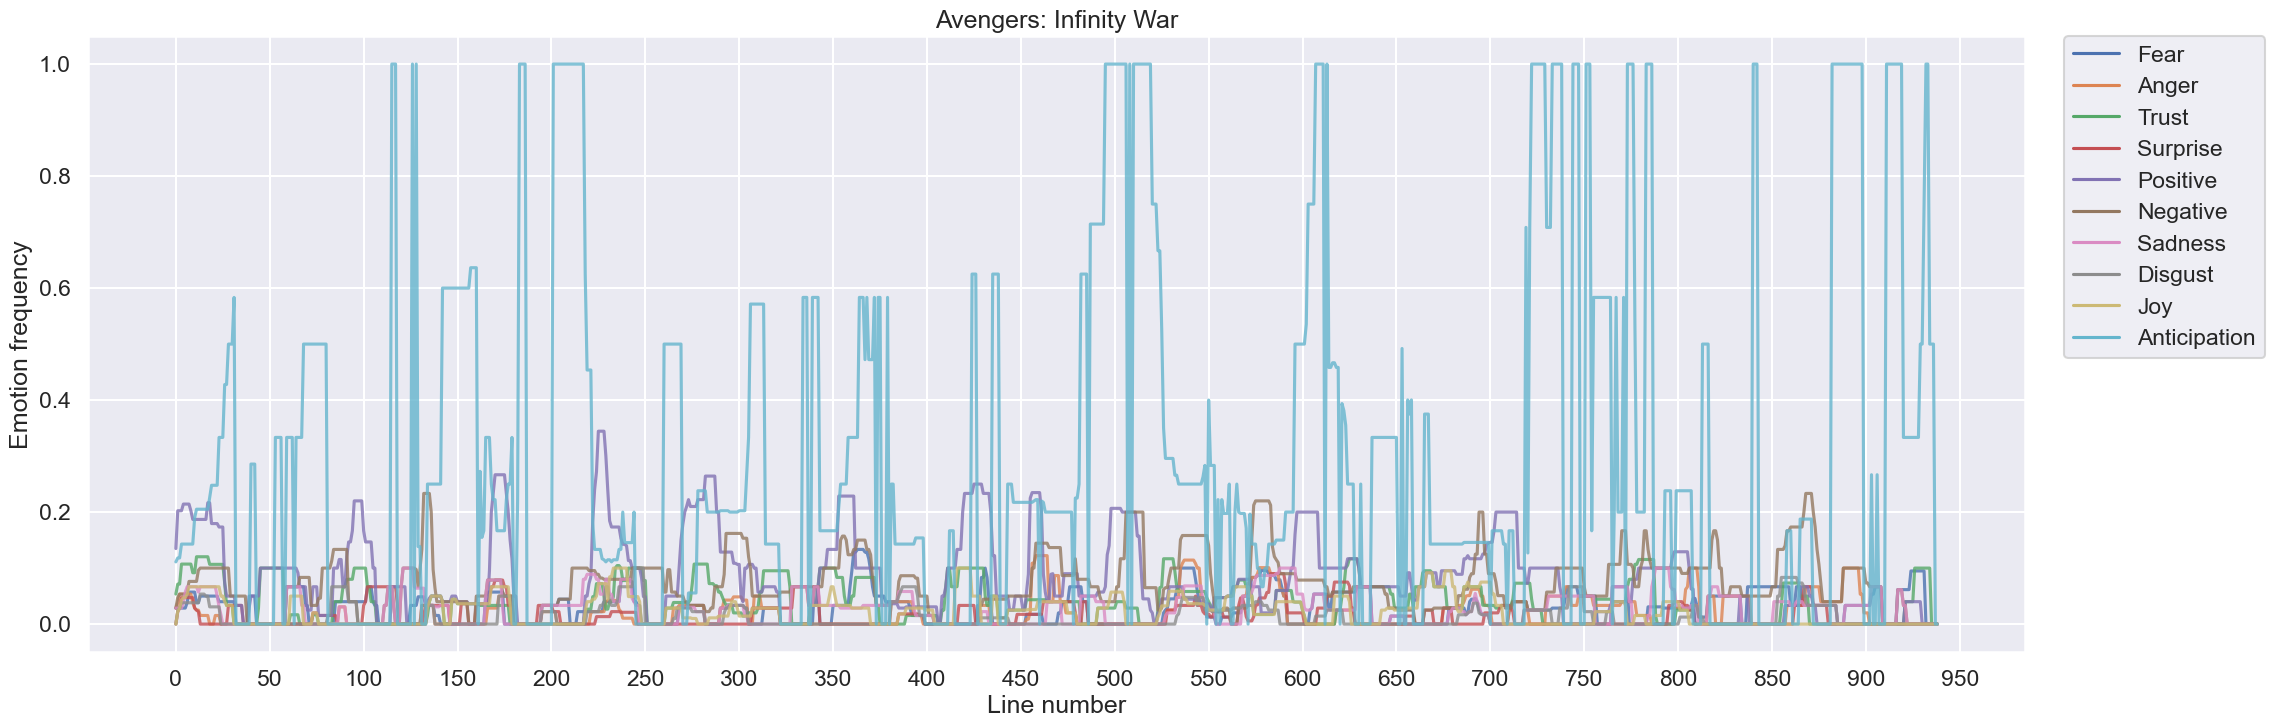

In [84]:
plt.figure(figsize=(25, 8))
sns.set_context("talk", font_scale=1)
sns.lineplot(data=nrc.iloc[:, 27:37], dashes=False, alpha=0.8)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(0, 1000, 50))
plt.xlabel('Line number')
plt.ylabel('Emotion frequency')
plt.title('Avengers: Infinity War')
plt.show()
# plot.legend(loc='upper right')

## Whole movie

<AxesSubplot:title={'center':'Avengers: Infinity War'}, xlabel='Emotion Frequency', ylabel='Emotion Classification'>

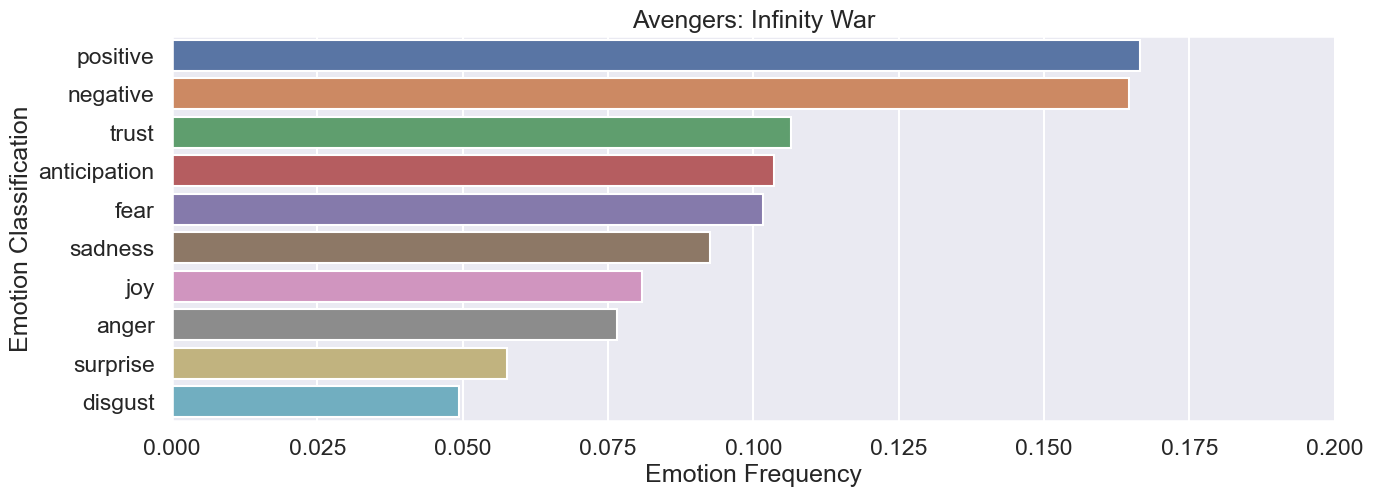

In [85]:
# Emotion frequencies for whole movie
all_line = " ".join(char_line for char_line in nrc['Lemma'])

all_line_text_object = NRCLex(all_line)

frequency_data = all_line_text_object.affect_frequencies
frequency_df = pd.DataFrame.from_dict(frequency_data, orient='index')
frequency_df = frequency_df.reset_index()
frequency_df = frequency_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
frequency_df = frequency_df.sort_values(by=['Emotion Frequency'], ascending=False)

frequency_df = frequency_df[frequency_df['Emotion Classification'] != 'anticip']

plt.figure(figsize=(15, 5))
plt.title('Avengers: Infinity War')
sns.set_context("talk", font_scale=1)
plt.xlim([0, 0.2])
sns.barplot(x='Emotion Frequency', y='Emotion Classification', data=frequency_df)

<AxesSubplot:title={'center':'Avengers: Infinity War'}, xlabel='Emotion Count', ylabel='Emotion Classification'>

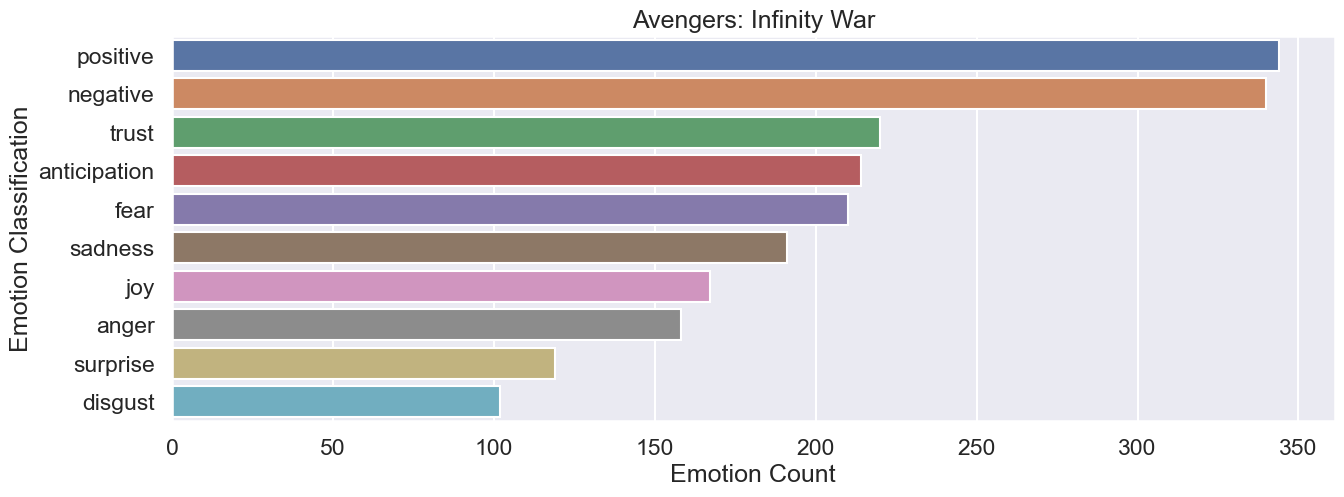

In [86]:
# Emotion frequencies for whole movie
all_line = " ".join(char_line for char_line in nrc['Lemma'])

all_line_text_object = NRCLex(all_line)

score_data = all_line_text_object.raw_emotion_scores
score_df = pd.DataFrame.from_dict(score_data, orient='index')
score_df = score_df.reset_index()
score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Count'})
score_df = score_df.sort_values(by=['Emotion Count'], ascending=False)

score_df

plt.figure(figsize=(15, 5))
plt.title('Avengers: Infinity War')
sns.set_context("talk", font_scale=1)
sns.barplot(x='Emotion Count', y='Emotion Classification', data=score_df)

In [87]:
# Export csv files
score_df.to_csv(r'/Users/ceciliali/Documents/MSc Data Science/Visual Analytics/coursework_marvel/infinityWarEmotion.csv',
              index=False)

## By characters

In [88]:
nrc.head()

lineNum     character                                               line  \
0        1  ASGARDIAN PA  This is the Asgardian refugee vessel Statesman...   
1        2     EBONY MAW  Hear me, and rejoice. You have had the privile...   
2        3        THANOS  I know what it's like to lose. To feel so desp...   
3        4          THOR                                 You talk too much.   
4        5        THANOS  The Tesseract, or your brother's head. I assum...   

                                          clean_line  \
0  This is the Asgardian refugee vessel Statesman...   
1  Hear me and rejoice You have had the privilege...   
2  I know what its like to lose To feel so desper...   
3                                  You talk too much   
4  The Tesseract or your brothers head I assume y...   

                                          POS tagged  \
0  [(Asgardian, a), (refugee, n), (vessel, n), (S...   
1  [(Hear, None), (rejoice, v), (privilege, n), (...   
2  [(know, v), (like, n), (lose, v), (feel, v), (...   
3                             [(talk, v), (much, a)]   
4  [(Tesseract, n), (brothers, n), (head, v), (as...   

                                               Lemma  \
0    Asgardian refugee vessel Statesman assault r...   
1    Hear rejoice privilege save Great Titan may ...   
2    know like lose feel desperately youre right ...   
3                                          talk much   
4           Tesseract brother head assume preference   

                                text_object      fear     anger     trust  \
0  <nrclex.NRCLex object at 0x7f9e858795b0>  0.142857  0.214286  0.071429   
1  <nrclex.NRCLex object at 0x7f9e85879700>  0.047619  0.047619  0.142857   
2  <nrclex.NRCLex object at 0x7f9e85879580>  0.142857  0.142857  0.000000   
3  <nrclex.NRCLex object at 0x7f9e858795e0>  0.000000  0.000000  0.000000   
4  <nrclex.NRCLex object at 0x7f9e85879550>  0.000000  0.000000  0.500000   

   ...      Fear     Anger     Trust  Surprise  Positive  Negative   Sadness  \
0  ...  0.028571  0.028571  0.053571  0.000000  0.134921  0.028571  0.028571   
1  ...  0.028571  0.038095  0.071429  0.022222  0.202381  0.047619  0.028571   
2  ...  0.028571  0.053571  0.071429  0.028571  0.202381  0.053571  0.028571   
3  ...  0.028571  0.053571  0.107143  0.047222  0.202381  0.053571  0.028571   
4  ...  0.028571  0.053571  0.107143  0.047222  0.214286  0.053571  0.038095   

    Disgust       Joy  Anticipation  
0  0.000000  0.000000      0.111111  
1  0.023810  0.022222      0.118056  
2  0.028571  0.028571      0.118056  
3  0.038095  0.042857      0.142857  
4  0.038095  0.047222      0.142857  

[5 rows x 37 columns]

In [89]:
char_most_line = ['TONY STARK', 'THOR', 'THANOS', 'STEVE ROGERS', 'BRUCE BANNER','NATASHA ROMANOFF']

In [90]:
# Initiate dataframe
char_df = pd.DataFrame()

for char in char_most_line:
    all_line = nrc.loc[nrc['character'] == char]['Lemma']
    text_object = NRCLex(" ".join(line for line in all_line))
    
    score_data = text_object.affect_frequencies

    score_df = pd.DataFrame.from_dict(score_data, orient='index')
    score_df = score_df.reset_index()
    score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
    score_df['character'] = char
    char_df = char_df.append(score_df, ignore_index=True)

In [91]:
char_df = char_df[char_df['Emotion Classification'] != 'anticip']

Text(0.5, 1.0, 'Avengers: Infinity War')

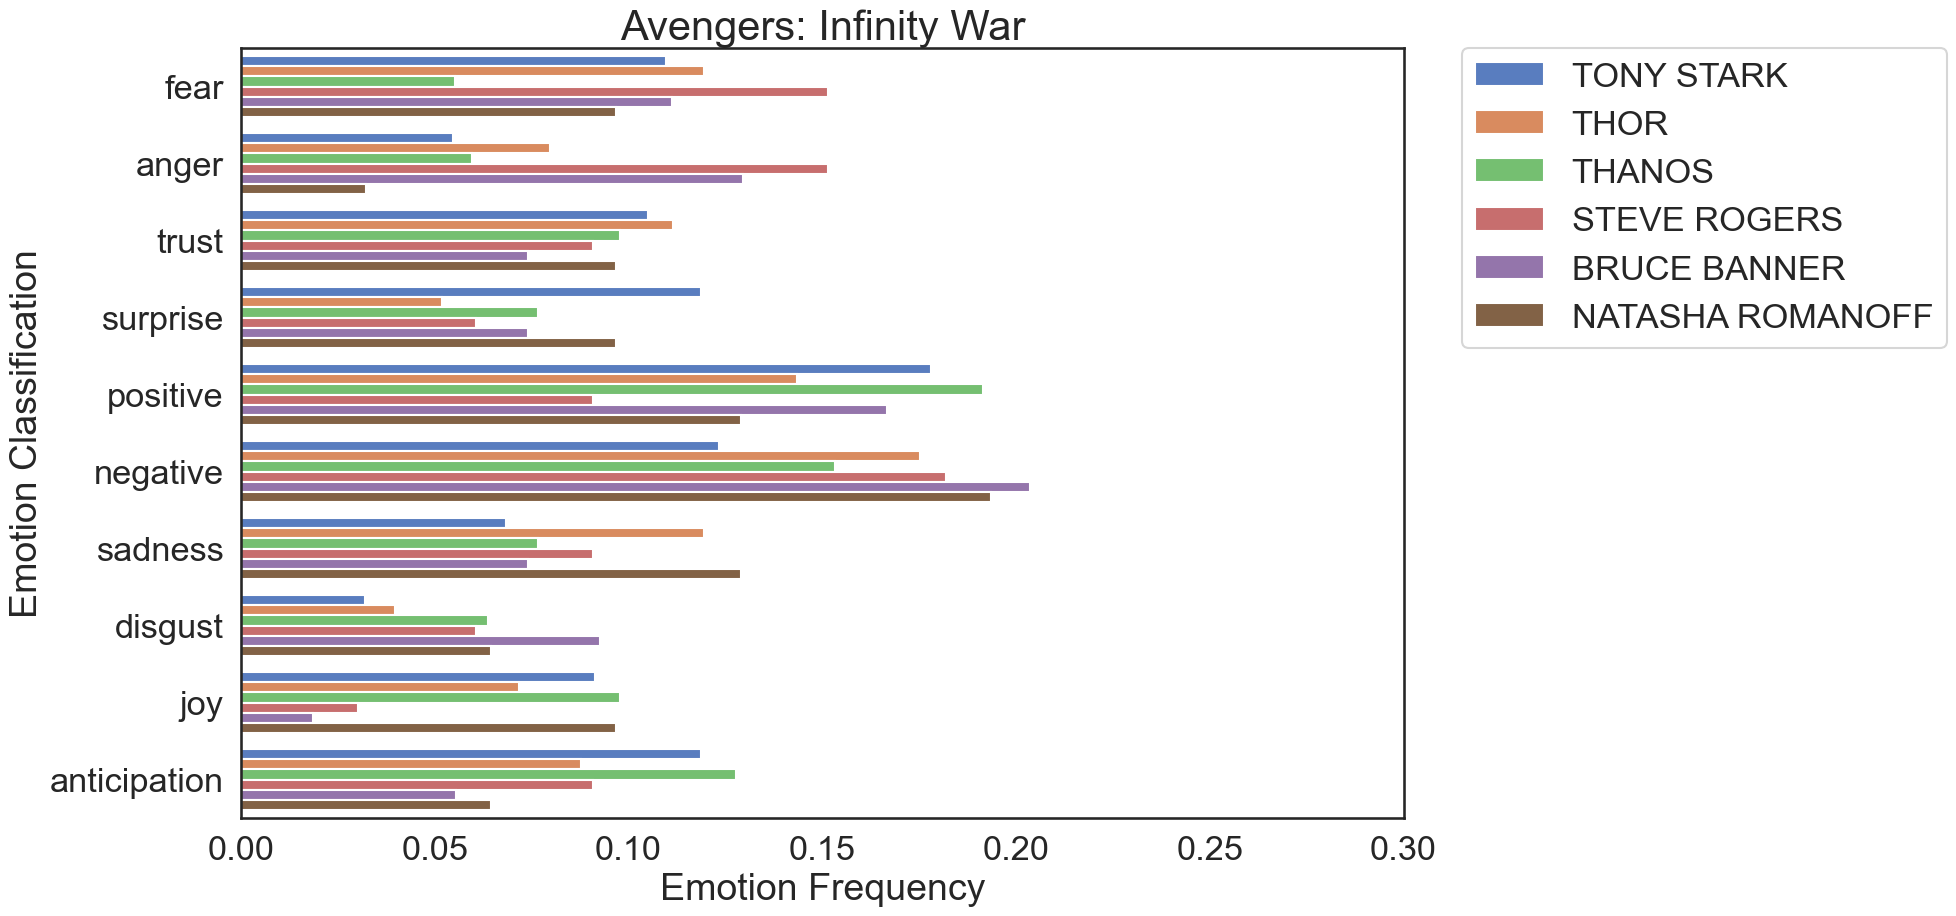

In [92]:
plt.figure(figsize=(15, 10))
sns.set_style("white")
sns.set_context("talk", font_scale=1.5)
sns.barplot(x='Emotion Frequency', y='Emotion Classification', palette='muted', hue='character', data=char_df)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0, 0.3])
plt.title('Avengers: Infinity War', fontsize=30)

In [93]:
# Export csv files
char_df.to_csv(r'/Users/ceciliali/Documents/MSc Data Science/Visual Analytics/coursework_marvel/infinityWarCharDF.csv',
              index=False)

# Test

In [94]:
for char in char_most_line:
    all_line = nrc.loc[nrc['character'] == char]['Lemma']
    all_line_sentence = " ".join(line for line in all_line)
    all_line_token = word_tokenize(all_line_sentence)
    allWordDist = nltk.FreqDist(w.lower() for w in all_line_token)
    mostCommon = allWordDist.most_common(10)
    print(char, ':\n', mostCommon)
#     score_data = text_object.affect_frequencies

#     score_df = pd.DataFrame.from_dict(score_data, orient='index')
#     score_df = score_df.reset_index()
#     score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
#     score_df['character'] = char
#     char_df = char_df.append(score_df, ignore_index=True)

TONY STARK :
 [('get', 20), ('im', 18), ('dont', 15), ('youre', 13), ('yeah', 12), ('know', 9), ('na', 9), ('kid', 8), ('ta', 8), ('go', 8)]
THOR :
 [('go', 8), ('thanos', 8), ('know', 7), ('stone', 6), ('im', 6), ('kill', 5), ('dont', 4), ('die', 4), ('hammer', 4), ('rabbit', 4)]
THANOS :
 [('one', 12), ('know', 11), ('youre', 8), ('stone', 7), ('im', 6), ('time', 5), ('daughter', 5), ('like', 4), ('whats', 4), ('little', 4)]
STEVE ROGERS :
 [('go', 4), ('get', 3), ('im', 3), ('way', 2), ('fight', 2), ('na', 2), ('vision', 2), ('head', 2), ('whered', 2), ('lets', 1)]
BRUCE BANNER :
 [('come', 12), ('hulk', 9), ('tony', 8), ('im', 8), ('get', 7), ('okay', 5), ('stone', 5), ('like', 5), ('thanos', 4), ('make', 4)]
NATASHA ROMANOFF :
 [('dont', 2), ('deal', 2), ('take', 2), ('bruce', 2), ('look', 2), ('wan', 1), ('na', 1), ('kill', 1), ('think', 1), ('stay', 1)]


## N-gram

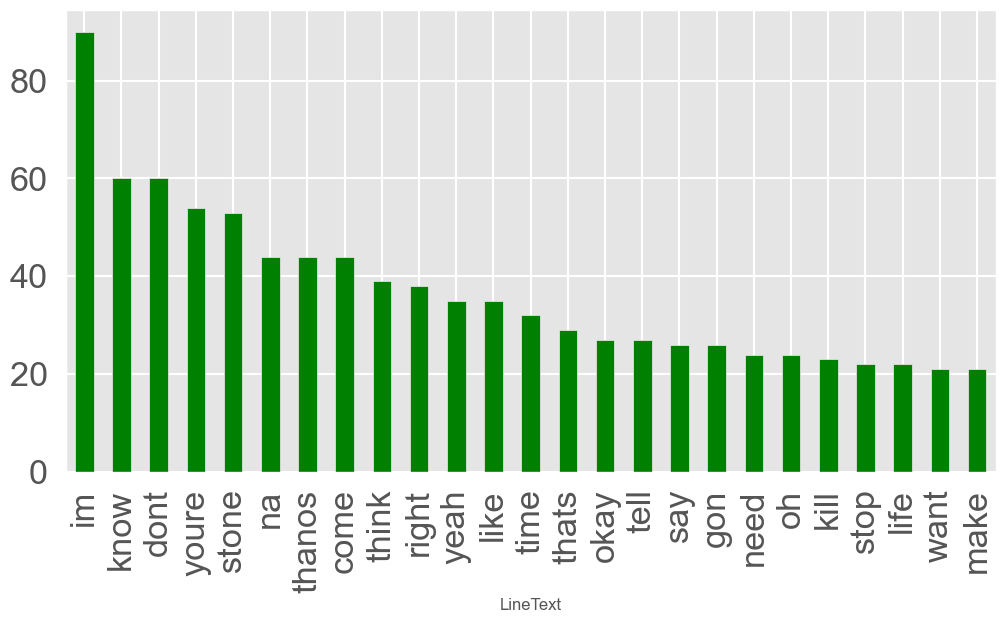

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

mpl.style.use('ggplot')
common_words = get_top_n_words(script['Lemma'], 25)
df1 = pd.DataFrame(common_words, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,6))
df1.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(color='green')
plt.show()

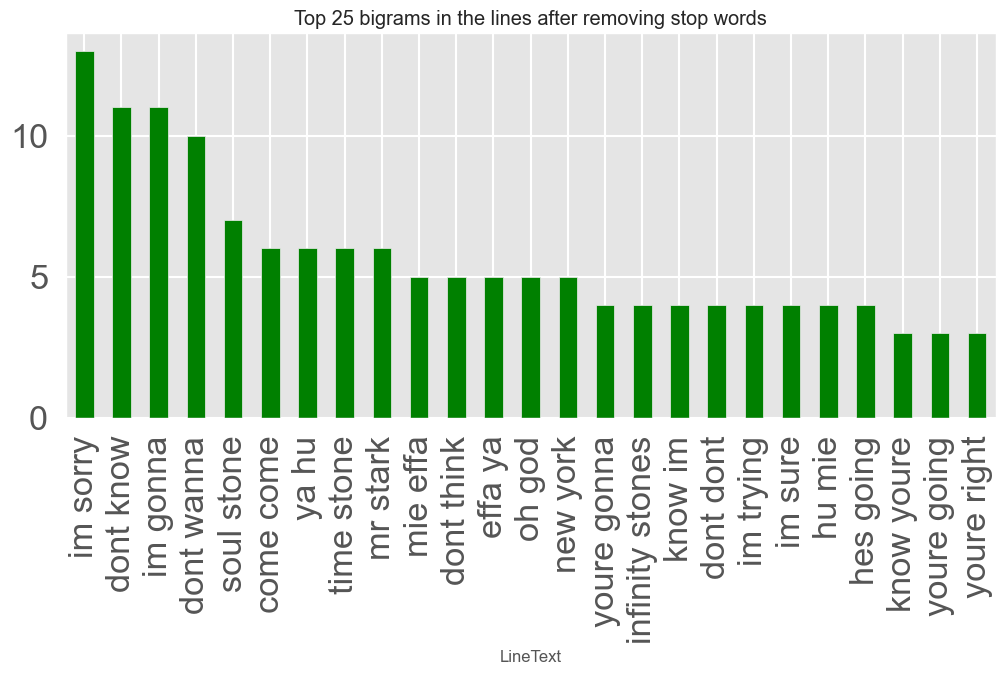

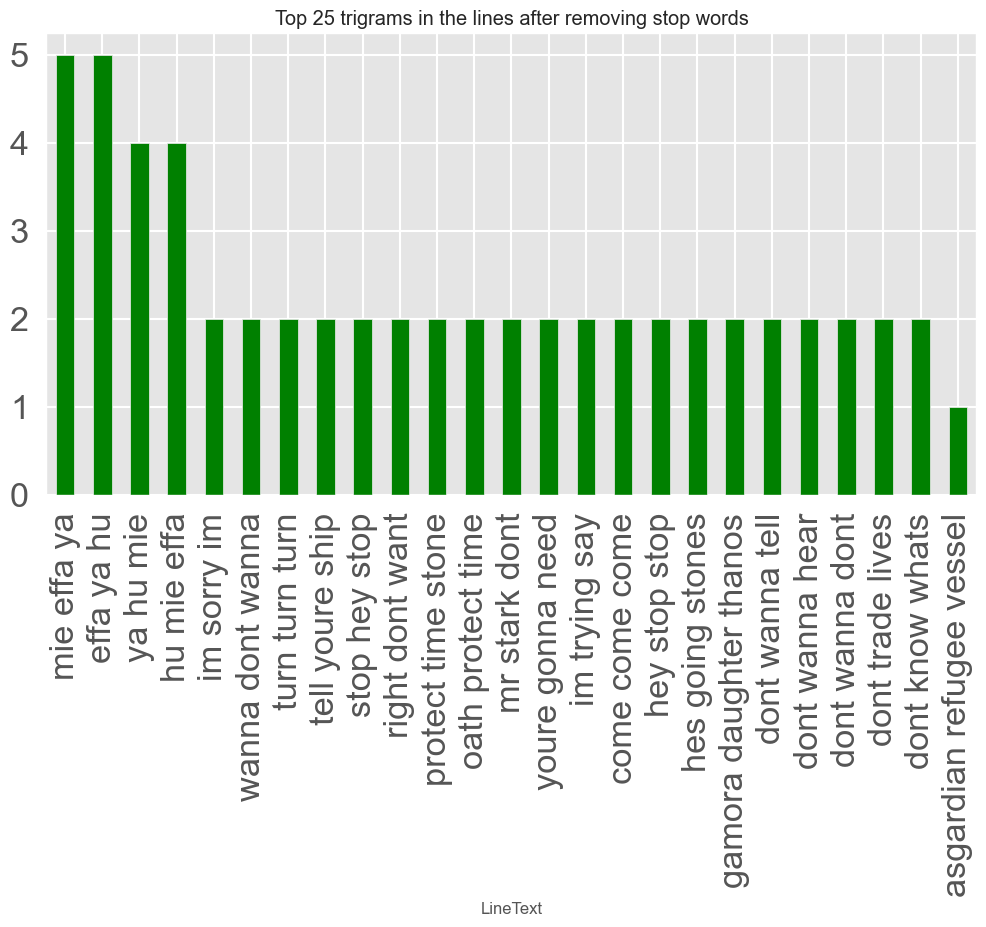

In [96]:
def get_top_k_n_gram(corpus, k=None, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:k]

common_bigrams = get_top_k_n_gram(script['clean_line'], 25,2)
df3 = pd.DataFrame(common_bigrams, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,5))
df3.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(
    title='Top 25 bigrams in the lines after removing stop words',color='green')
plt.show()

common_trigrams = get_top_k_n_gram(script['clean_line'], 25,3)
df3 = pd.DataFrame(common_trigrams, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,6))
df3.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(
    title='Top 25 trigrams in the lines after removing stop words',color='green')
plt.show()